# EDA
Perform time series Exploratory Data Analysis (EDA) 
Data: pred_maint_timeseries_with_failures.csv


In [75]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import numpy as np
from scipy.stats import shapiro, normaltest, probplot

from statsmodels.tsa.seasonal import seasonal_decompose

Defaulting to user installation because normal site-packages is not writeable


In [68]:
%run "variables.py"

In [73]:
%run "functions.ipynb" 

# Data loading

Load the two CSV files, pred_maint_timeseries_with_failures.csv into pandas DataFrame.


In [28]:
# df = pd.read_csv(f'{DATA_DIR}/pred_maint_timeseries_with_failures.csv')
df = pd.read_csv(f'{DATA_DIR}/pred_maint_year_outliers_nulls.csv')
display(df.head())

machineid        datetimestamp  enginegastemperature1  \
0          1  2025-01-01 00:00:00             302.483571   
1          1  2025-01-01 00:10:00             303.837174   
2          1  2025-01-01 00:20:00             299.877724   
3          1  2025-01-01 00:30:00             303.323272   
4          1  2025-01-01 00:40:00             297.766293   

   enginegastemperature2  enginegastemperature3  enginegastemperature4  \
0             385.408617             303.238443             307.615149   
1             300.111109             297.861035             297.340913   
2             301.777757             302.085056             304.162309   
3             303.895963             294.494511             305.651141   
4                    NaN             301.614999                    NaN   

   enginegastemperature5  enginegastemperature6    pressure  
0             298.829233             298.829315  103.158426  
1             299.412622             301.110395   98.464047  
2             298.533004             299.850807  100.190252  
3             301.865595             298.067635   97.682460  
4             289.108329             294.780518  100.345387

# Data Exploration

## Descriptive statistics

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262800 entries, 0 to 262799
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   machineid              262800 non-null  int64  
 1   datetimestamp          262800 non-null  object 
 2   enginegastemperature1  247227 non-null  float64
 3   enginegastemperature2  247090 non-null  float64
 4   enginegastemperature3  247028 non-null  float64
 5   enginegastemperature4  247054 non-null  float64
 6   enginegastemperature5  247144 non-null  float64
 7   enginegastemperature6  247013 non-null  float64
 8   pressure               247183 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 18.0+ MB


In [30]:
exploreDataFrame(df=df, df_name= "Pred Maint")


Exploring DataFrame: Pred Maint

Shape: (262800, 9) 

Data Types:
 machineid                  int64
datetimestamp             object
enginegastemperature1    float64
enginegastemperature2    float64
enginegastemperature3    float64
enginegastemperature4    float64
enginegastemperature5    float64
enginegastemperature6    float64
pressure                 float64
dtype: object 

Missing Values:
 machineid                    0
datetimestamp                0
enginegastemperature1    15573
enginegastemperature2    15710
enginegastemperature3    15772
enginegastemperature4    15746
enginegastemperature5    15656
enginegastemperature6    15787
pressure                 15617
dtype: int64 



In [31]:
summarizeDataFrame(df)

Column Name Data type   Count  Missing Values (#)  \
0              machineid     int64  262800                   0   
1          datetimestamp    object  262800                   0   
2  enginegastemperature1   float64  247227               15573   
3  enginegastemperature2   float64  247090               15710   
4  enginegastemperature3   float64  247028               15772   
5  enginegastemperature4   float64  247054               15746   
6  enginegastemperature5   float64  247144               15656   
7  enginegastemperature6   float64  247013               15787   
8               pressure   float64  247183               15617   

   Missing Values (%)        Mean        STD         Min         25%  \
0                0.00    3.000000   1.414216    1.000000    2.000000   
1                0.00         NaN        NaN         NaN         NaN   
2                5.93  301.005185  10.162036  274.324401  296.668605   
3                5.98  301.018421  10.165767  278.760206  296.684787   
4                6.00  301.001678  10.078226  277.104182  296.680902   
5                5.99  300.979173   9.992302  274.785904  296.678926   
6                5.96  301.009782  10.133638  277.900384  296.682406   
7                6.01  300.987688   9.999966  277.166279  296.675826   
8                5.94   99.996430   2.000203   90.433522   98.646041   

          50%         75%         Max  
0    3.000000    4.000000    5.000000  
1         NaN         NaN         NaN  
2  300.080749  303.515262  411.196321  
3  300.101600  303.533725  411.948091  
4  300.103268  303.522036  411.385510  
5  300.075432  303.534017  412.125814  
6  300.085919  303.526350  414.453470  
7  300.099480  303.546116  410.752224  
8   99.992047  101.345026  109.312485

In [34]:
display(df.describe())

machineid  enginegastemperature1  enginegastemperature2  \
count  262800.000000          247227.000000          247090.000000   
mean        3.000000             301.005185             301.018421   
std         1.414216              10.162036              10.165767   
min         1.000000             274.324401             278.760206   
25%         2.000000             296.668605             296.684787   
50%         3.000000             300.080749             300.101600   
75%         4.000000             303.515262             303.533725   
max         5.000000             411.196321             411.948091   

       enginegastemperature3  enginegastemperature4  enginegastemperature5  \
count          247028.000000          247054.000000          247144.000000   
mean              301.001678             300.979173             301.009782   
std                10.078226               9.992302              10.133638   
min               277.104182             274.785904             277.900384   
25%               296.680902             296.678926             296.682406   
50%               300.103268             300.075432             300.085919   
75%               303.522036             303.534017             303.526350   
max               411.385510             412.125814             414.453470   

       enginegastemperature6       pressure  
count          247013.000000  247183.000000  
mean              300.987688      99.996430  
std                 9.999966       2.000203  
min               277.166279      90.433522  
25%               296.675826      98.646041  
50%               300.099480      99.992047  
75%               303.546116     101.345026  
max               410.752224     109.312485

In [35]:
# enginegastemperature1
# In a normal distribution, the mean ≈ median.
mean = df['enginegastemperature1'].mean()
median = df['enginegastemperature1'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 301.0051849840636, Median: 300.0807488639182


In [36]:
print("Skewness:", df['enginegastemperature1'].skew())
print("Kurtosis:", df['enginegastemperature1'].kurt())

Skewness: 5.840548650377032
Kurtosis: 45.25392357053644


### Null values

In [37]:
display(df.isnull().sum())

machineid                    0
datetimestamp                0
enginegastemperature1    15573
enginegastemperature2    15710
enginegastemperature3    15772
enginegastemperature4    15746
enginegastemperature5    15656
enginegastemperature6    15787
pressure                 15617
dtype: int64

In [38]:
# Verify if there no any number
display(df.isna().sum())

machineid                    0
datetimestamp                0
enginegastemperature1    15573
enginegastemperature2    15710
enginegastemperature3    15772
enginegastemperature4    15746
enginegastemperature5    15656
enginegastemperature6    15787
pressure                 15617
dtype: int64

### Duplicated values

In [39]:
df.duplicated().any

<bound method Series.any of 0         False
1         False
2         False
3         False
4         False
          ...  
262795    False
262796    False
262797    False
262798    False
262799    False
Length: 262800, dtype: bool>

### Index

In [13]:
df.index

RangeIndex(start=0, stop=262800, step=1)

In [14]:
df = df.set_index('datetimestamp')

In [15]:
df.index

Index(['2025-01-01 00:00:00', '2025-01-01 00:10:00', '2025-01-01 00:20:00',
       '2025-01-01 00:30:00', '2025-01-01 00:40:00', '2025-01-01 00:50:00',
       '2025-01-01 01:00:00', '2025-01-01 01:10:00', '2025-01-01 01:20:00',
       '2025-01-01 01:30:00',
       ...
       '2025-12-31 22:20:00', '2025-12-31 22:30:00', '2025-12-31 22:40:00',
       '2025-12-31 22:50:00', '2025-12-31 23:00:00', '2025-12-31 23:10:00',
       '2025-12-31 23:20:00', '2025-12-31 23:30:00', '2025-12-31 23:40:00',
       '2025-12-31 23:50:00'],
      dtype='object', name='datetimestamp', length=262800)

## Analyze features

In [16]:
analyzeDFFeatures(df=df, df_name= "Pred Maint")

DataFrame: Pred Maint


Numerical Features:

           machineid  enginegastemperature1  enginegastemperature2  \
count  262800.000000          262800.000000          262800.000000   
mean        3.000000             301.013095             301.016729   
std         1.414216              10.181835              10.160601   
min         1.000000             274.324401             278.760206   
25%         2.000000             296.674232             296.682120   
50%         3.000000             300.084453             300.100254   
75%         4.000000             303.516394             303.533216   
max         5.000000             411.196321             411.948091   

       enginegastemperature3  enginegastemperature4  enginegastemperature5  \
count          262800.000000          262800.000000          262800.000000   
mean              300.996511             300.980933             301.002924   
std                10.060855              10.009863              10.107151   
min         

## Outliers

In [44]:
# Function to find outliers in a single DataFrame
findOutliersDF(df=df, df_name= "Pred Maint")


Potential outliers in machineid:
 0

Potential outliers in enginegastemperature1:
 4933

Potential outliers in enginegastemperature2:
 4844

Potential outliers in enginegastemperature3:
 4807

Potential outliers in enginegastemperature4:
 4689

Potential outliers in enginegastemperature5:
 4822

Potential outliers in enginegastemperature6:
 4710

Potential outliers in pressure:
 1720


## Time Series Plot

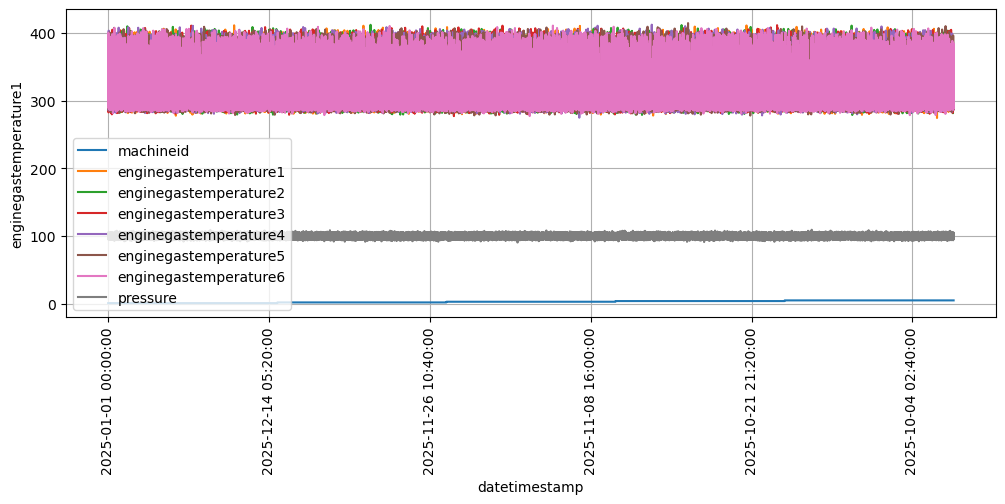

In [18]:
ax =df.plot(figsize=(12,4))
ax.grid()
plt.xticks(rotation=90) 
ax.set_ylabel('enginegastemperature1');

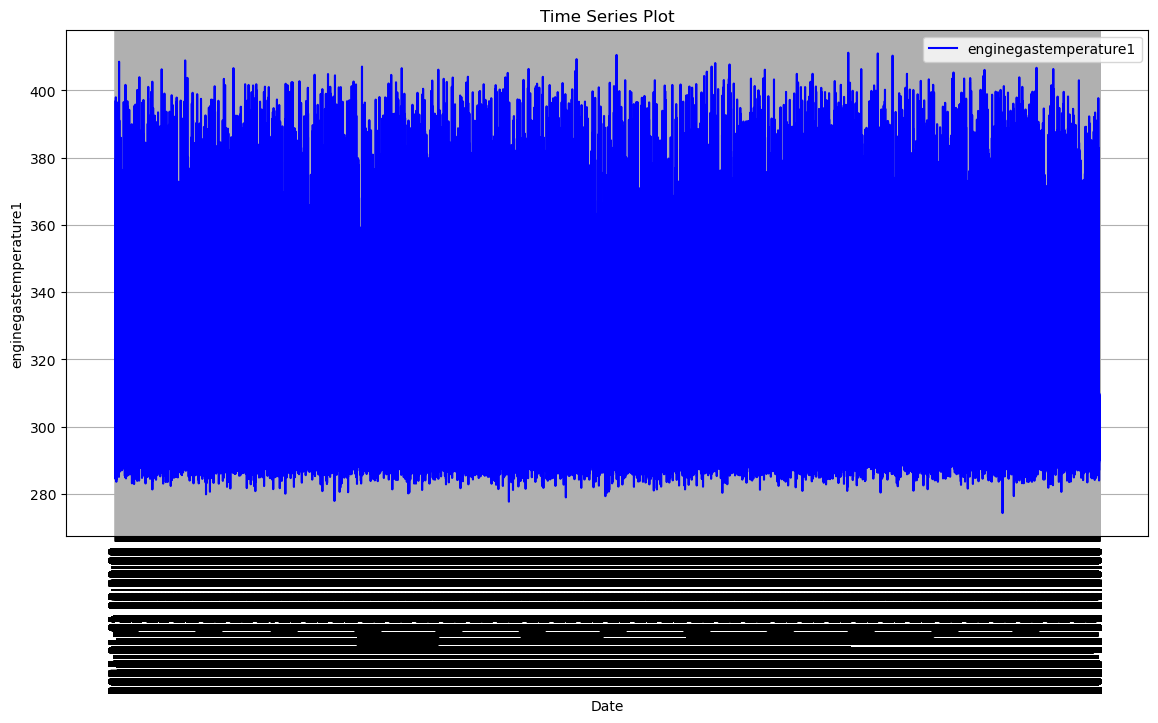

In [19]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['enginegastemperature1'], label='enginegastemperature1', color='blue')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('enginegastemperature1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=90) 
plt.show()

## Distribution

In [45]:
columns_plot=['enginegastemperature1', 'enginegastemperature2','enginegastemperature3', 'enginegastemperature4', 'enginegastemperature5', 'enginegastemperature6']
columns=['enginegastemperature1', 'enginegastemperature2','enginegastemperature3', 'enginegastemperature4', 'enginegastemperature5', 'enginegastemperature6','pressure']    

### Histogram

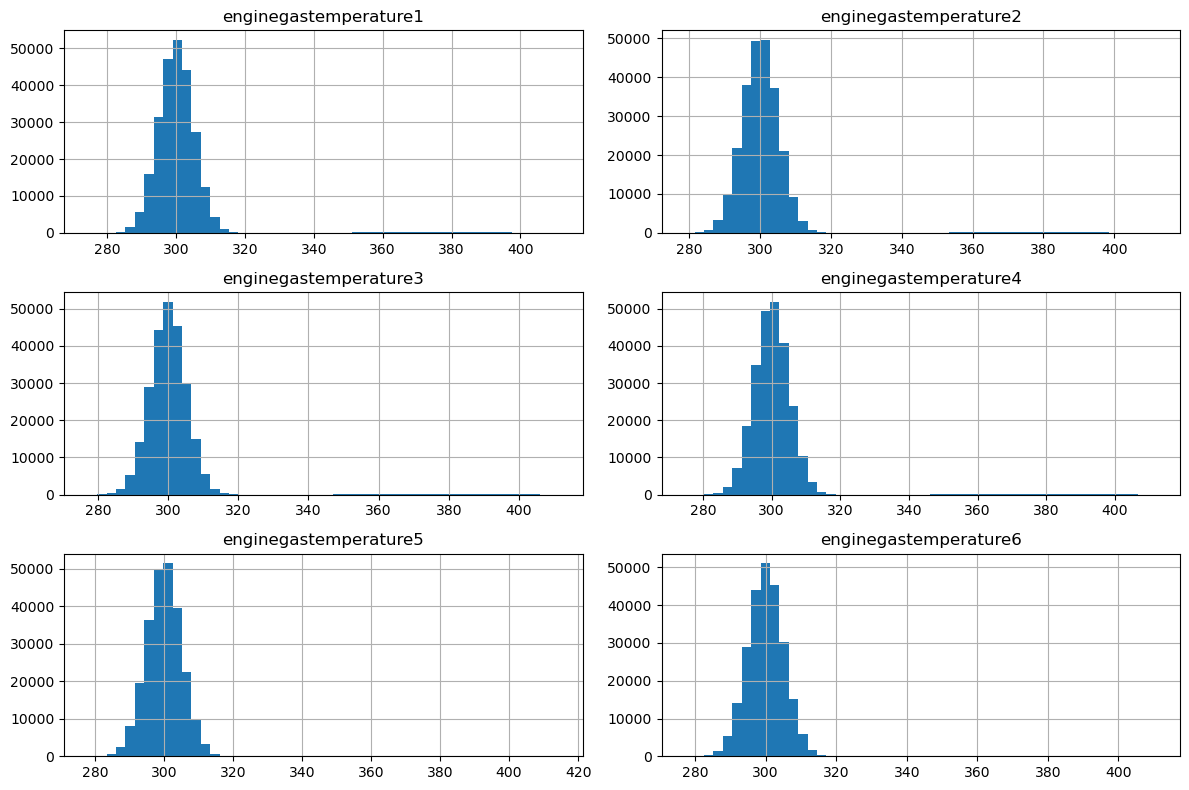

In [46]:
df[columns_plot].hist(figsize=(12, 8), bins=50)
plt.tight_layout()
plt.show()

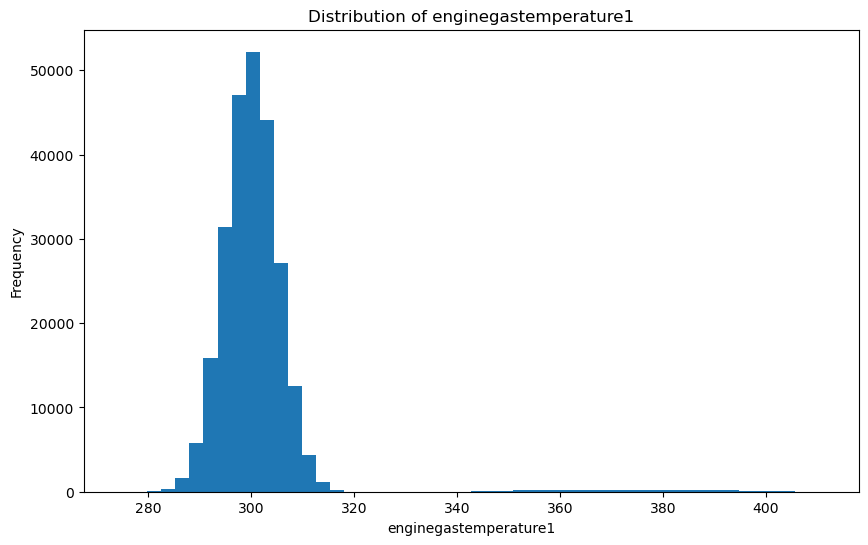

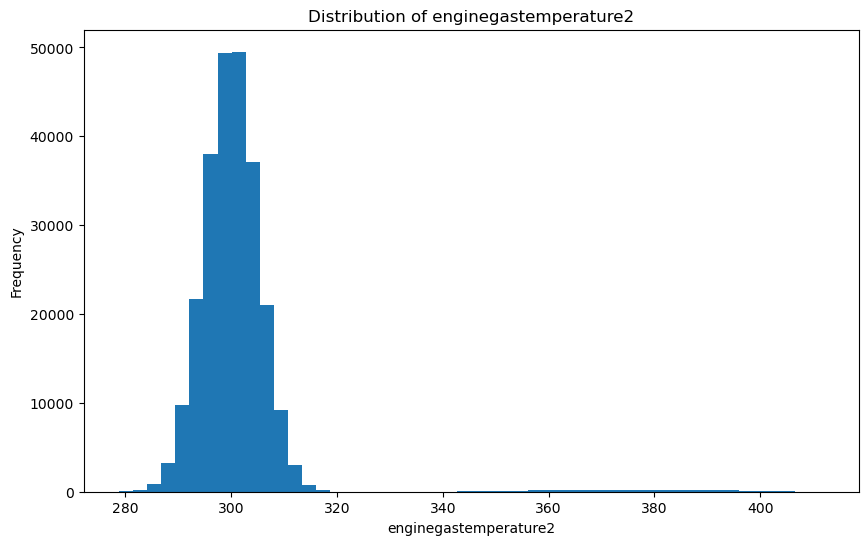

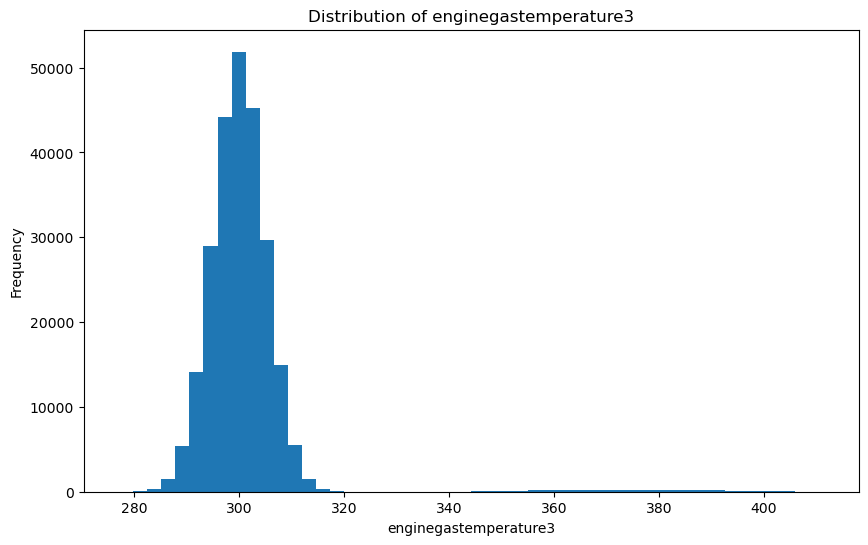

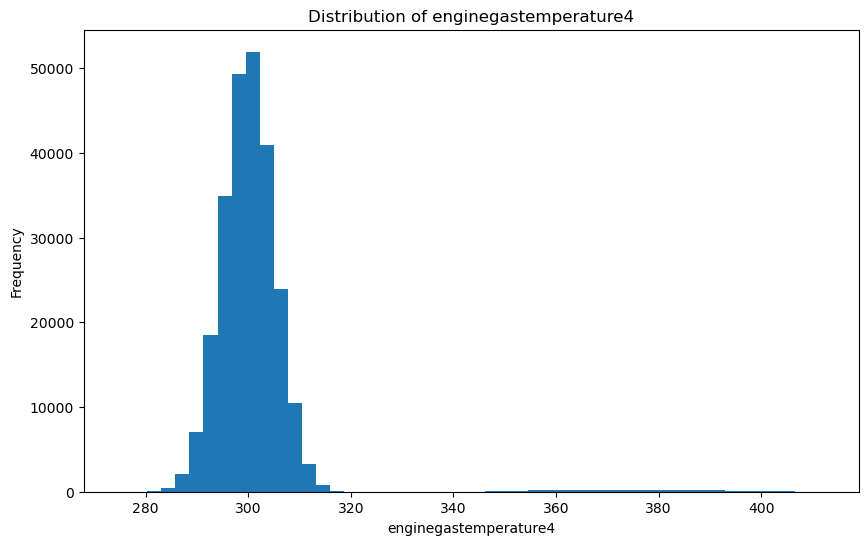

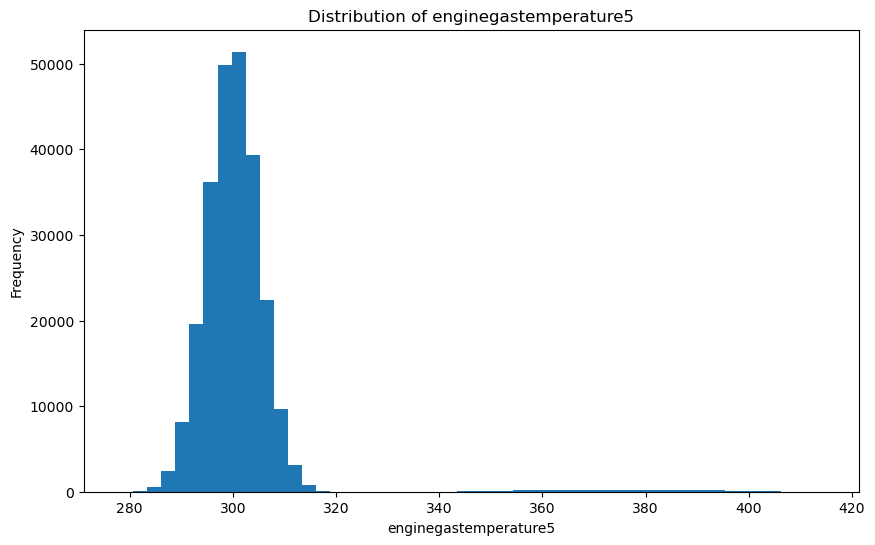

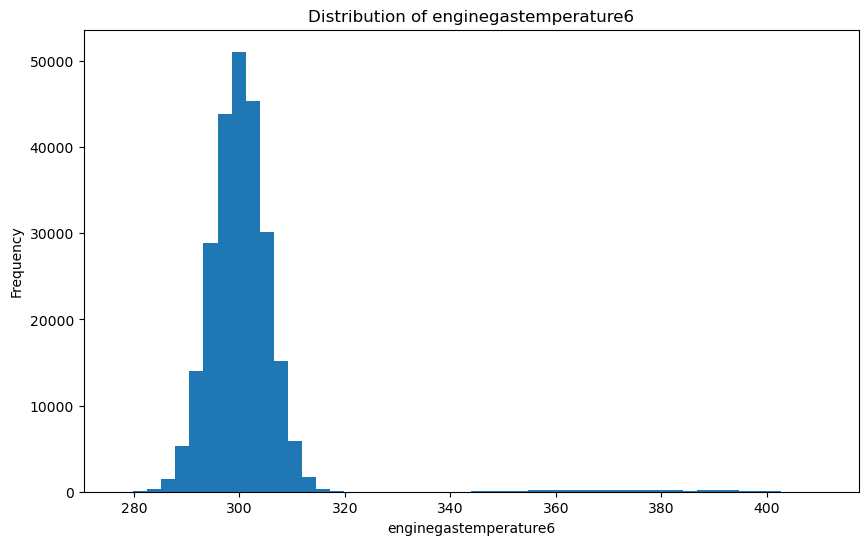

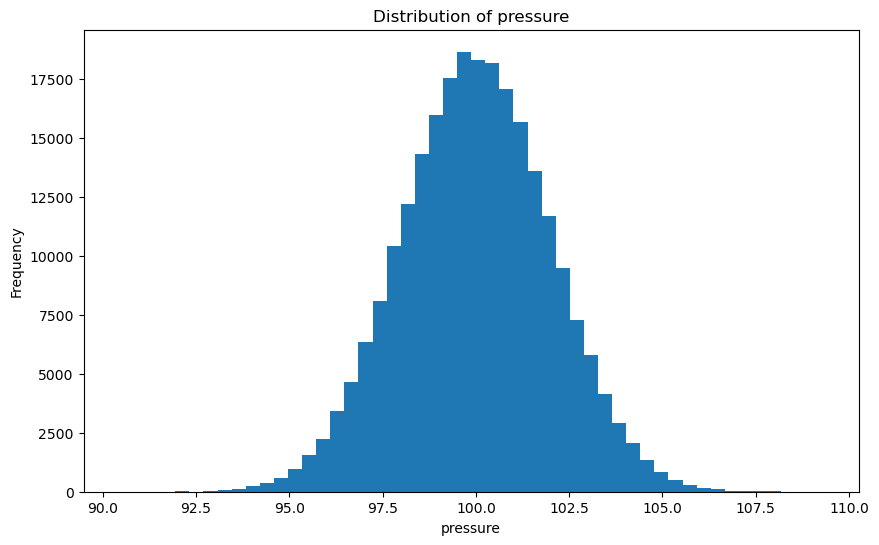

In [47]:
sensor_columns = [f'enginegastemperature{i}' for i in range(1, 7)] + ['pressure']

for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
sns.histplot(df['your_column'], kde=True)
plt.title("Histogram + KDE")
plt.show()

### Histogram + KDE (Kernel Density Estimate)

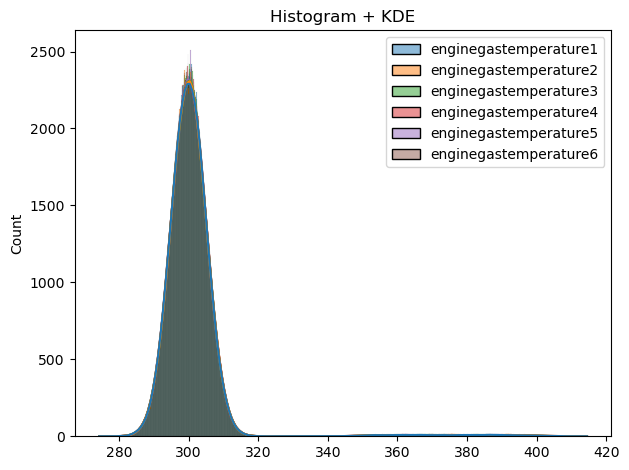

In [48]:
sns.histplot(df[columns_plot], kde=True)
plt.title("Histogram + KDE")
plt.tight_layout()
plt.show()

### Q-Q Plot

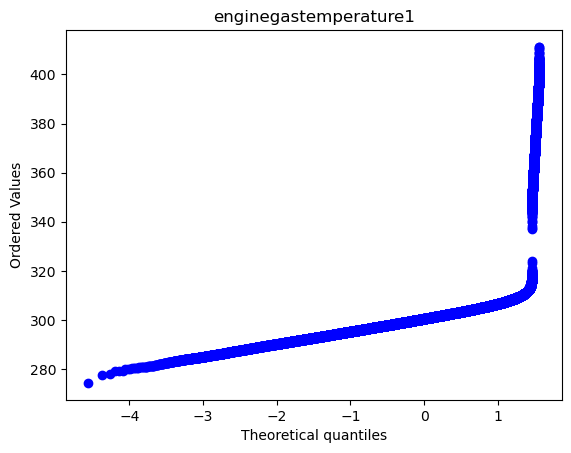

In [49]:
stats.probplot(df['enginegastemperature1'], dist="norm", plot=plt)
plt.title('enginegastemperature1')
plt.show()

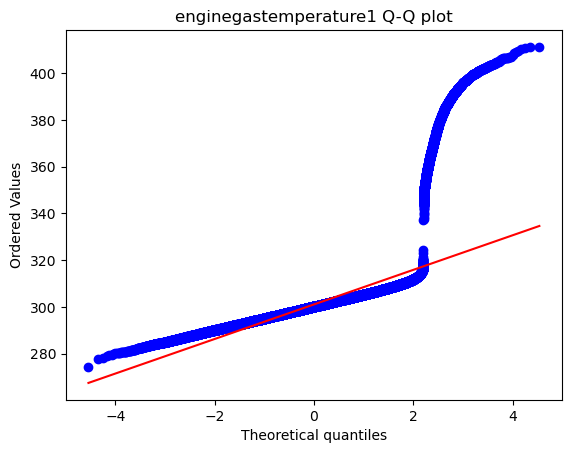

In [51]:
stats.probplot(df['enginegastemperature1'].dropna(), dist="norm", plot=plt)
plt.title('enginegastemperature1 Q-Q plot')
plt.show()

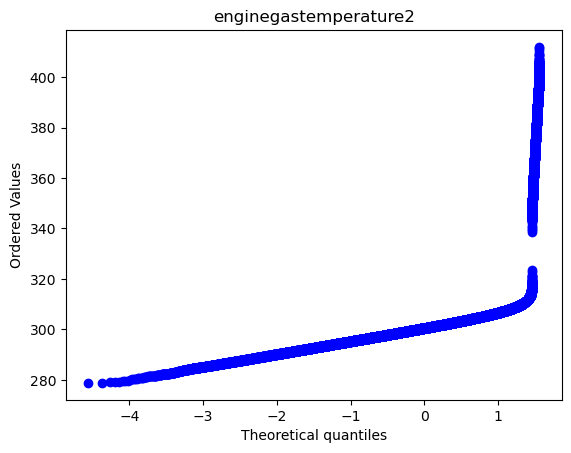

In [50]:
stats.probplot(df['enginegastemperature2'], dist="norm", plot=plt)
plt.title('enginegastemperature2')
plt.show()

### Boxplot (matplotlib)

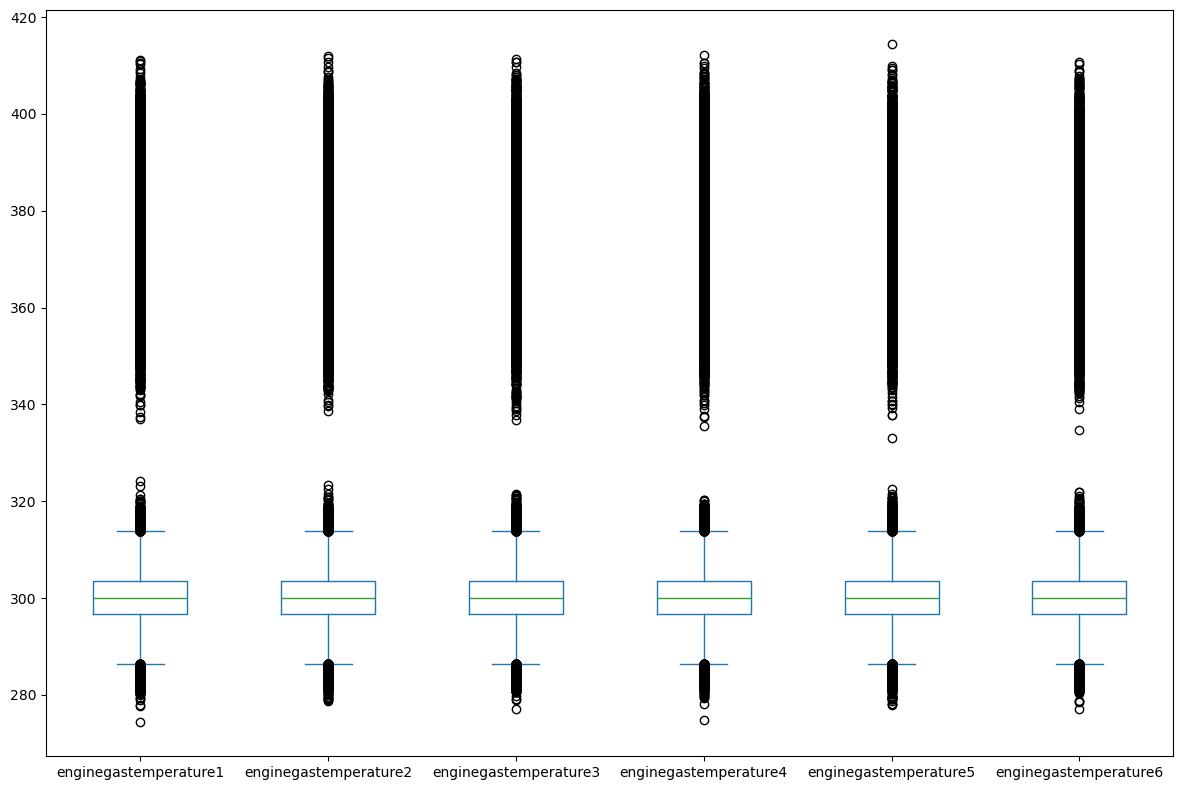

In [67]:
matplotlibBoxplot(df=df,columns=columns_plot)

### Box plot (seaborn)

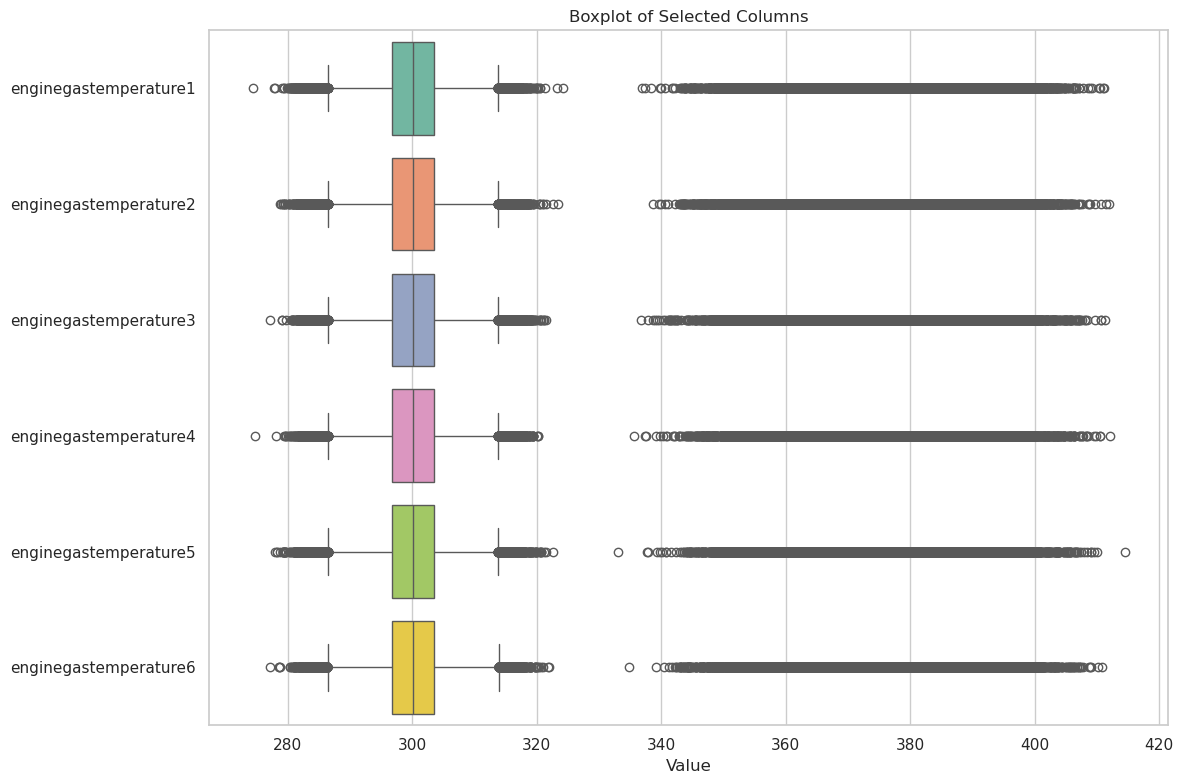

In [74]:
seabornBoxplot(df=df,columns=columns_plot)

<Axes: xlabel='enginegastemperature1'>

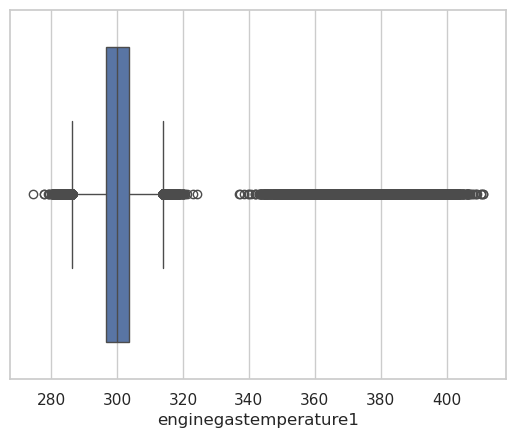

In [26]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, x="enginegastemperature1" ) # hue='machineid'

<Axes: ylabel='pressure'>

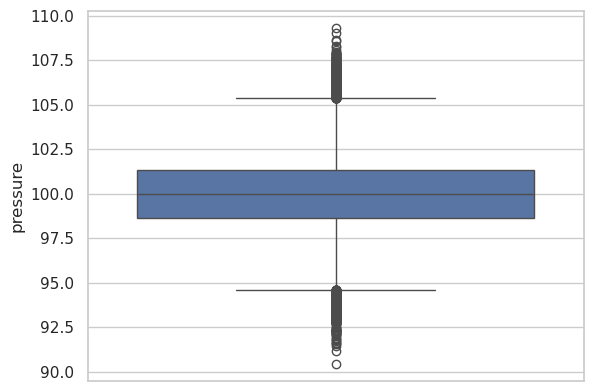

In [28]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, y="pressure" ) # hue='machineid'

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, y="pressure" ) #

### Is is normal 


📊 Analyzing: machineid


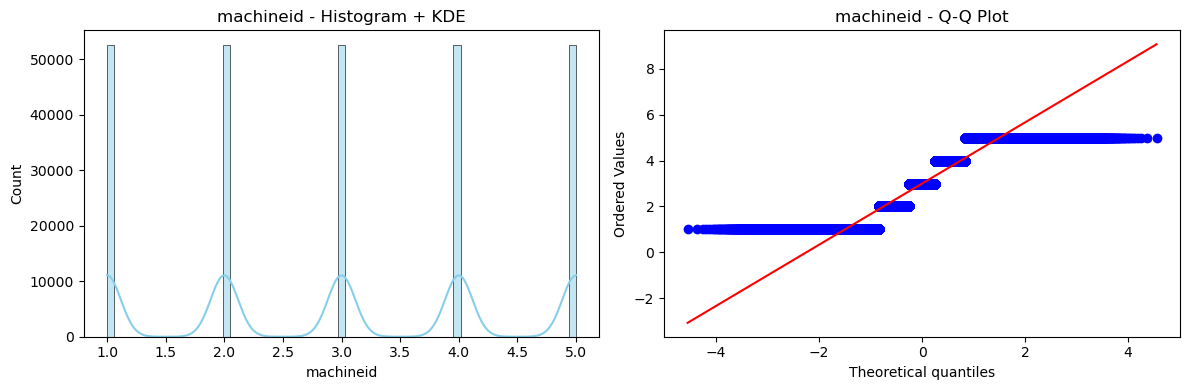


📊 Analyzing: enginegastemperature1


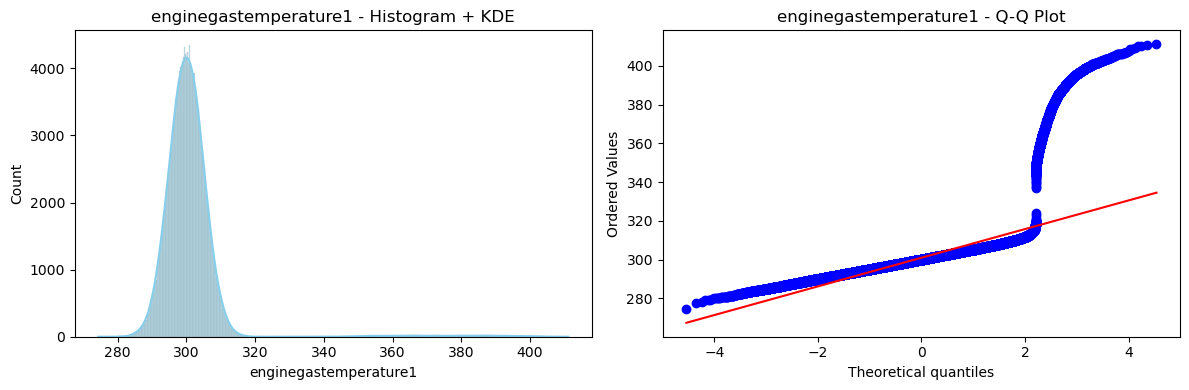


📊 Analyzing: enginegastemperature2


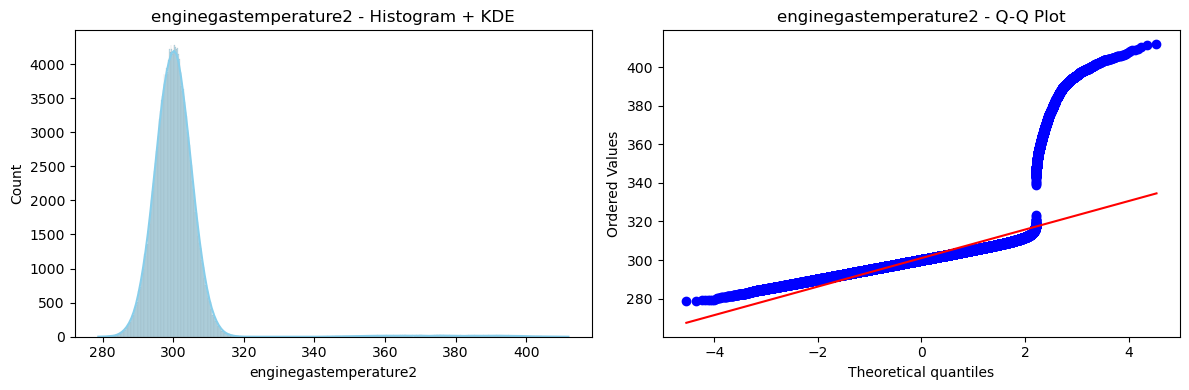


📊 Analyzing: enginegastemperature3


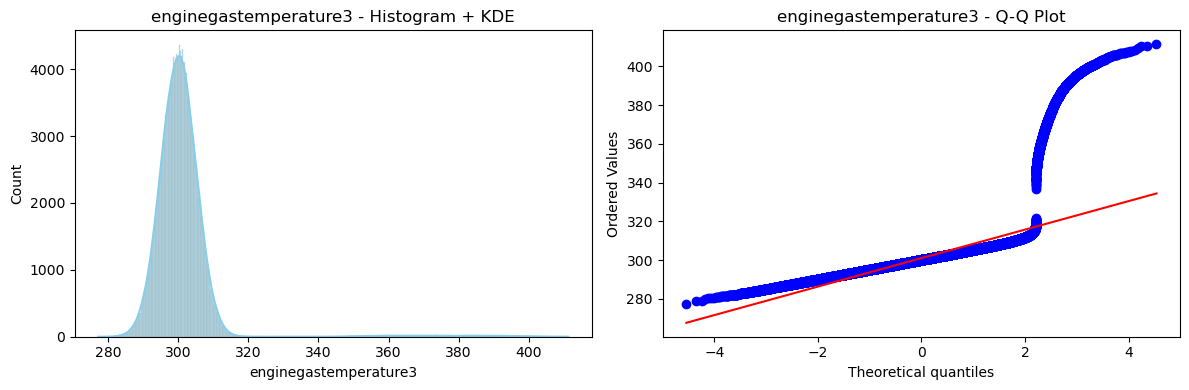


📊 Analyzing: enginegastemperature4


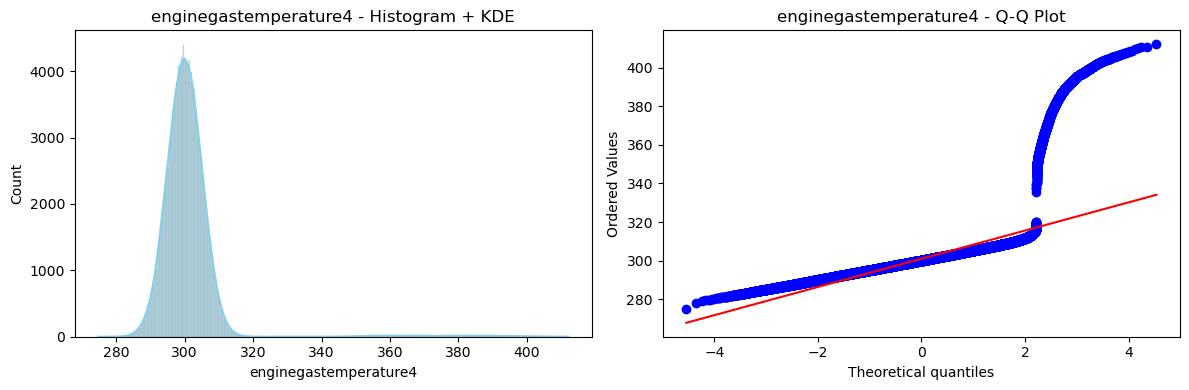


📊 Analyzing: enginegastemperature5


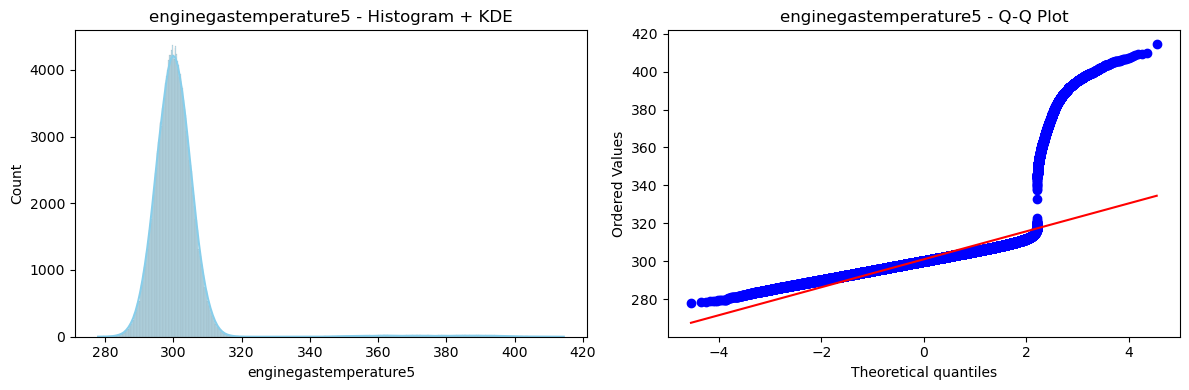


📊 Analyzing: enginegastemperature6


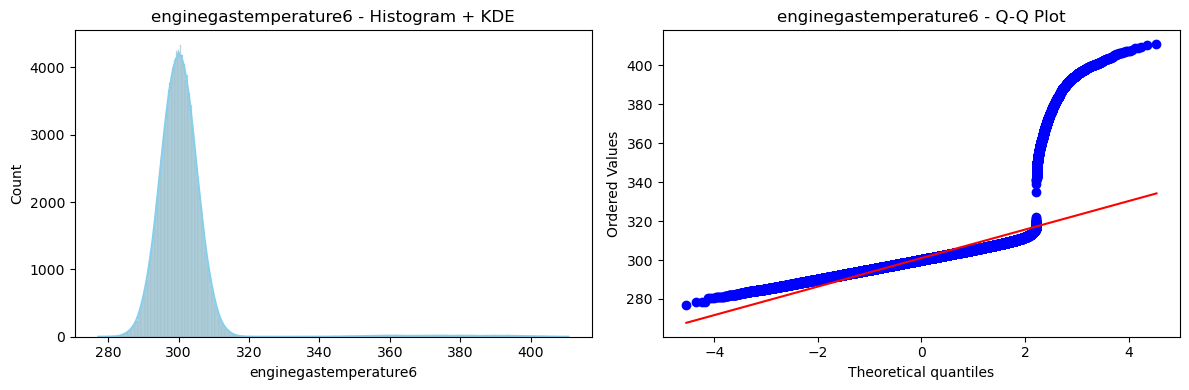


📊 Analyzing: pressure


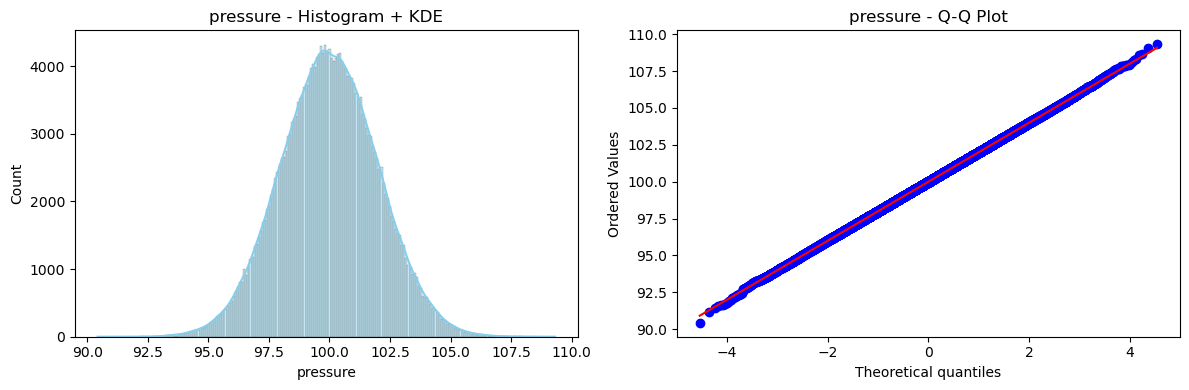

Column  Non-Null Count  Shapiro p-value  D’Agostino p-value  \
0              machineid          262800           0.0000              0.0000   
1  enginegastemperature1          247227           0.0000              0.0000   
2  enginegastemperature2          247090           0.0000              0.0000   
3  enginegastemperature3          247028           0.0000              0.0000   
4  enginegastemperature4          247054           0.0000              0.0000   
5  enginegastemperature5          247144           0.0000              0.0000   
6  enginegastemperature6          247013           0.0000              0.0000   
7               pressure          247183           0.3755              0.9754   

  Likely Normal?  
0           ❌ No  
1           ❌ No  
2           ❌ No  
3           ❌ No  
4           ❌ No  
5           ❌ No  
6           ❌ No  
7          ✅ Yes

In [60]:
check_dataframe_normality(df, alpha=0.05)

In [61]:

stat, p = shapiro(df['enginegastemperature1'].dropna())
print(f"Shapiro-Wilk p-value: {p}")

if p > 0.05:
    print("✅ Likely normal")
else:
    print("❌ Not normal")

Shapiro-Wilk p-value: 1.0367354278953366e-181
❌ Not normal


/programs/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 247227.
  res = hypotest_fun_out(*samples, **kwds)


In [62]:
stat, p = normaltest(df['enginegastemperature1'].dropna())
print(f"D’Agostino p-value: {p}")

if p > 0.05:
    print("✅ Likely normal")
else:
    print("❌ Not normal")

D’Agostino p-value: 0.0
❌ Not normal


## Correlation

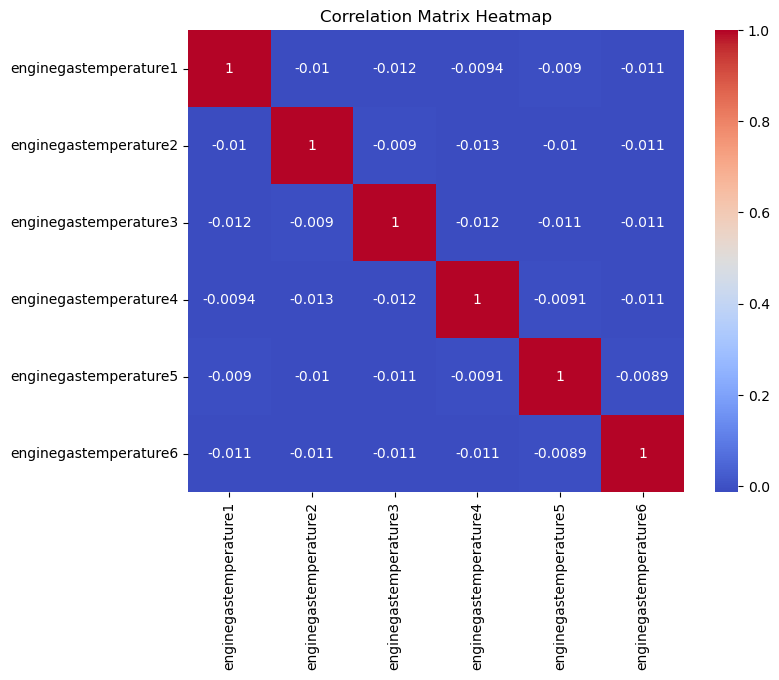

In [43]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[columns_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

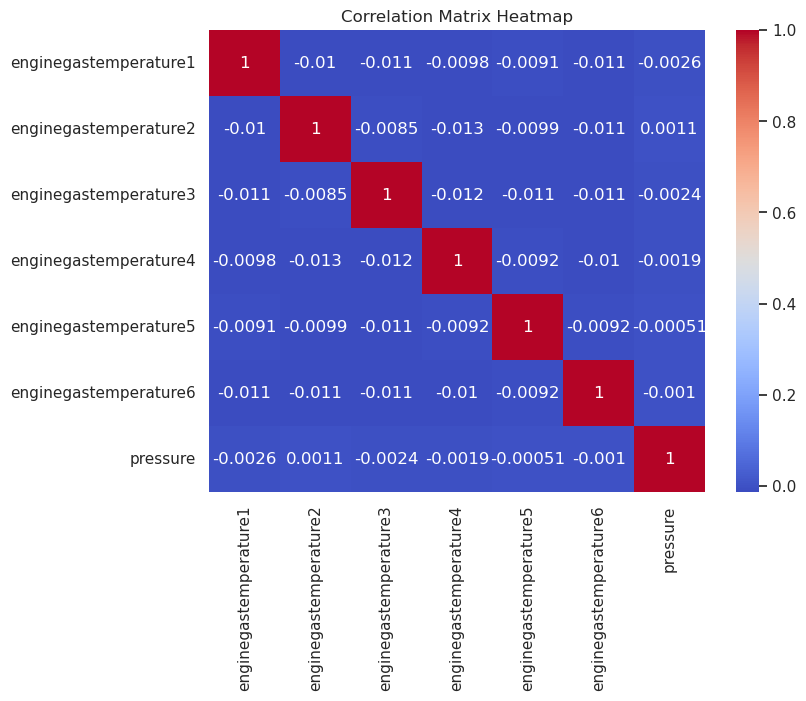

In [30]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Processing

In [79]:
df = df.fillna(0)

In [80]:
display(df.isnull().sum())

machineid                0
datetimestamp            0
enginegastemperature1    0
enginegastemperature2    0
enginegastemperature3    0
enginegastemperature4    0
enginegastemperature5    0
enginegastemperature6    0
pressure                 0
dtype: int64

## Data Sample for Visualizations

In [94]:
filtered_m1_df = df[df['machineid'] ==1]

In [95]:
filtered_m1_df

machineid        datetimestamp  enginegastemperature1  \
0              1  2025-01-01 00:00:00             302.483571   
1              1  2025-01-01 00:10:00             303.837174   
2              1  2025-01-01 00:20:00             299.877724   
3              1  2025-01-01 00:30:00             303.323272   
4              1  2025-01-01 00:40:00             297.766293   
...          ...                  ...                    ...   
52555          1  2025-12-31 23:10:00             304.754557   
52556          1  2025-12-31 23:20:00             308.862431   
52557          1  2025-12-31 23:30:00             295.392494   
52558          1  2025-12-31 23:40:00             295.866204   
52559          1  2025-12-31 23:50:00               0.000000   

       enginegastemperature2  enginegastemperature3  enginegastemperature4  \
0                 385.408617             303.238443             307.615149   
1                 300.111109             297.861035             297.340913   
2                 301.777757             302.085056             304.162309   
3                 303.895963             294.494511             305.651141   
4                   0.000000             301.614999               0.000000   
...                      ...                    ...                    ...   
52555             305.008887             294.737801             296.127302   
52556             301.775885             301.790375             309.678478   
52557             295.878337             293.587855             303.803581   
52558             301.137899             302.969602               0.000000   
52559             288.382774             301.905470             298.323019   

       enginegastemperature5  enginegastemperature6    pressure  
0                 298.829233             298.829315  103.158426  
1                 299.412622             301.110395   98.464047  
2                 298.533004             299.850807  100.190252  
3                 301.865595             298.067635   97.682460  
4                 289.108329             294.780518  100.345387  
...                      ...                    ...         ...  
52555             288.249079             305.234508  100.126512  
52556             298.004763             290.501735   99.245247  
52557             310.409135             305.019800   98.108763  
52558             308.739121             297.706764   96.950545  
52559             305.162222             299.100627   99.625924  

[52560 rows x 9 columns]

In [99]:
m1_df_sample = filtered_m1_df.sample(frac=0.2,random_state=42).sort_values(by=["datetimestamp"]) # machineid
m1_df_sample = m1_df_sample.drop('machineid', axis=1)

In [100]:
m1_df_sample

datetimestamp  enginegastemperature1  enginegastemperature2  \
4      2025-01-01 00:40:00             297.766293               0.000000   
6      2025-01-01 01:00:00             295.234861             294.760647   
7      2025-01-01 01:10:00             306.518306             303.311423   
31     2025-01-01 05:10:00             296.857151             296.037396   
34     2025-01-01 05:40:00             293.525288             299.474407   
...                    ...                    ...                    ...   
52527  2025-12-31 18:30:00             300.972805             295.902783   
52529  2025-12-31 18:50:00             307.252881             304.897955   
52539  2025-12-31 20:30:00               0.000000               0.000000   
52549  2025-12-31 22:10:00               0.000000             301.469577   
52550  2025-12-31 22:20:00             299.842958             300.362672   

       enginegastemperature3  enginegastemperature4  enginegastemperature5  \
4                 301.614999               0.000000             289.108329   
6                 290.621616             293.166089             303.181526   
7                 301.205611             299.158975             305.823843   
31                299.426318             302.524936               0.000000   
34                290.025192             293.499036             307.715338   
...                      ...                    ...                    ...   
52527             300.875067               0.000000             305.304342   
52529             302.049945             299.485540             298.580003   
52539             303.106527             304.297237               0.000000   
52549             300.122520             297.882321             300.742843   
52550             300.119223             303.956741             298.291966   

       enginegastemperature6    pressure  
4                 294.780518  100.345387  
6                 295.466397  100.952085  
7                 298.771262   98.460664  
31                293.998518   99.330998  
34                306.616319   99.743176  
...                      ...         ...  
52527             301.747119  100.260902  
52529             303.024676  100.161278  
52539             302.074097   98.113440  
52549             308.264807  103.647612  
52550             301.533621   95.939288  

[10512 rows x 8 columns]

## Nulls

In [109]:
df['Strikeouts'] = df['Strikeouts'].fillna(df['Strikeouts'].median())

KeyError: 'Strikeouts'

In [110]:
# Removing extreme values
limit_dict = {}
 
for col_name in df.columns:
    if (df[col_name].dtype in ['int64', 'float64']):
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3 - q1
        limit = q3 + (3.5*iqr)
        limit_dict[col_name] = limit
 
cond = [True]*len(df)
for key, limit in limit_dict.items():
    cond = cond & (df[key] <= limit)
    
print(len(df))
clean_df = df[cond]
print(len(clean_df)) 

262800
242957


/tmp/ipykernel_9196/4248657560.py:14: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  cond = cond & (df[key] <= limit)


# Seasonality

In [89]:
variables = ["enginegastemperature1","enginegastemperature2","enginegastemperature3","enginegastemperature4","enginegastemperature5","enginegastemperature6", "pressure"]

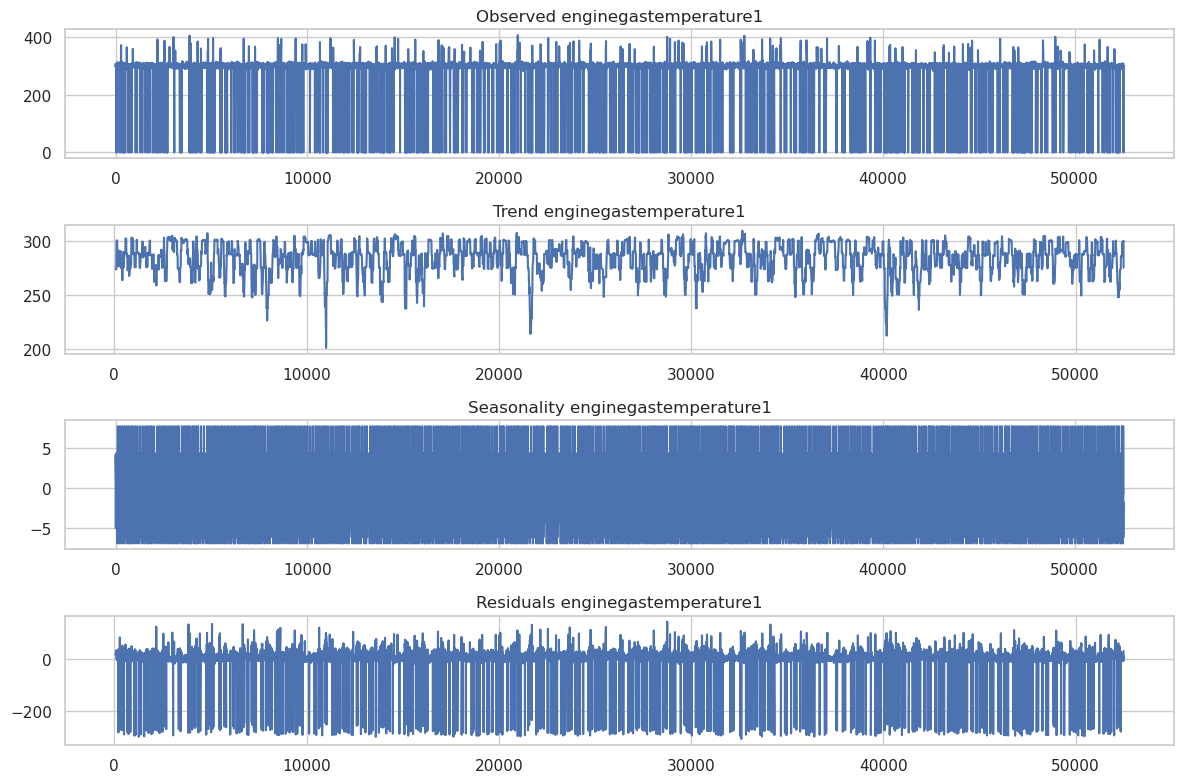

Analysis of enginegastemperature1:
Trend: Seasonality: Residuals: --------------------


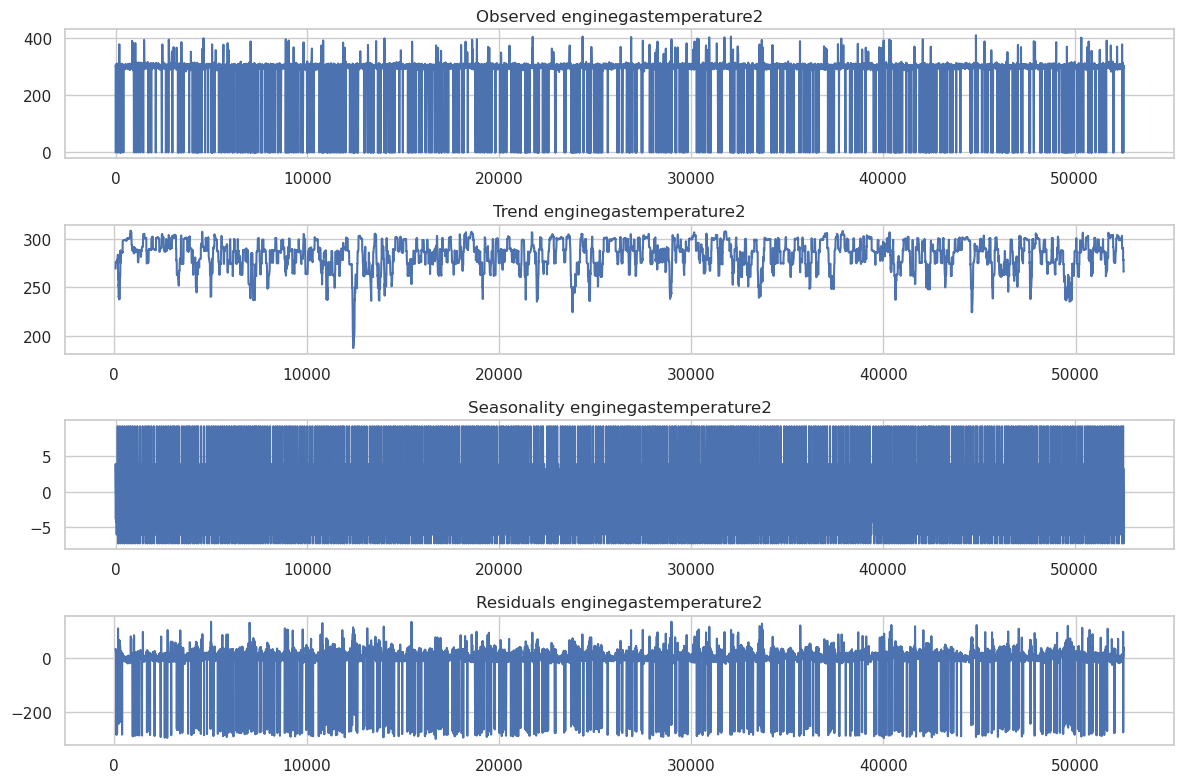

Analysis of enginegastemperature2:
Trend: Seasonality: Residuals: --------------------


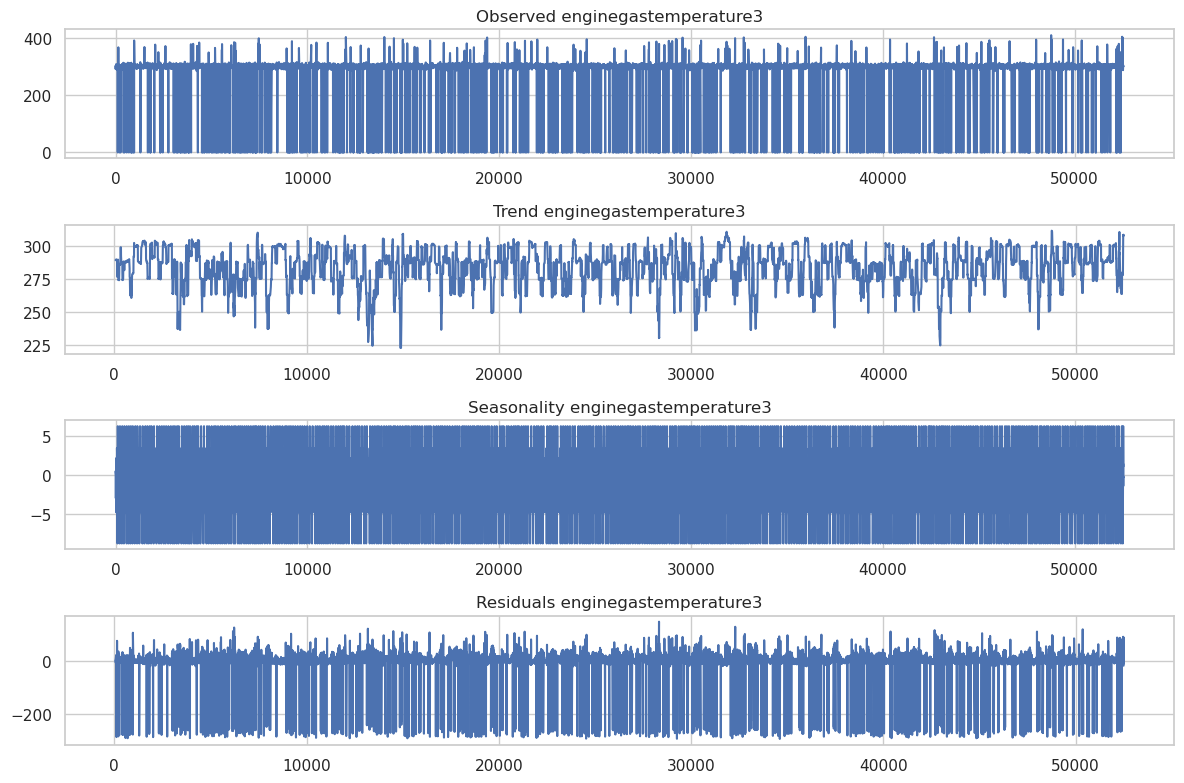

Analysis of enginegastemperature3:
Trend: Seasonality: Residuals: --------------------


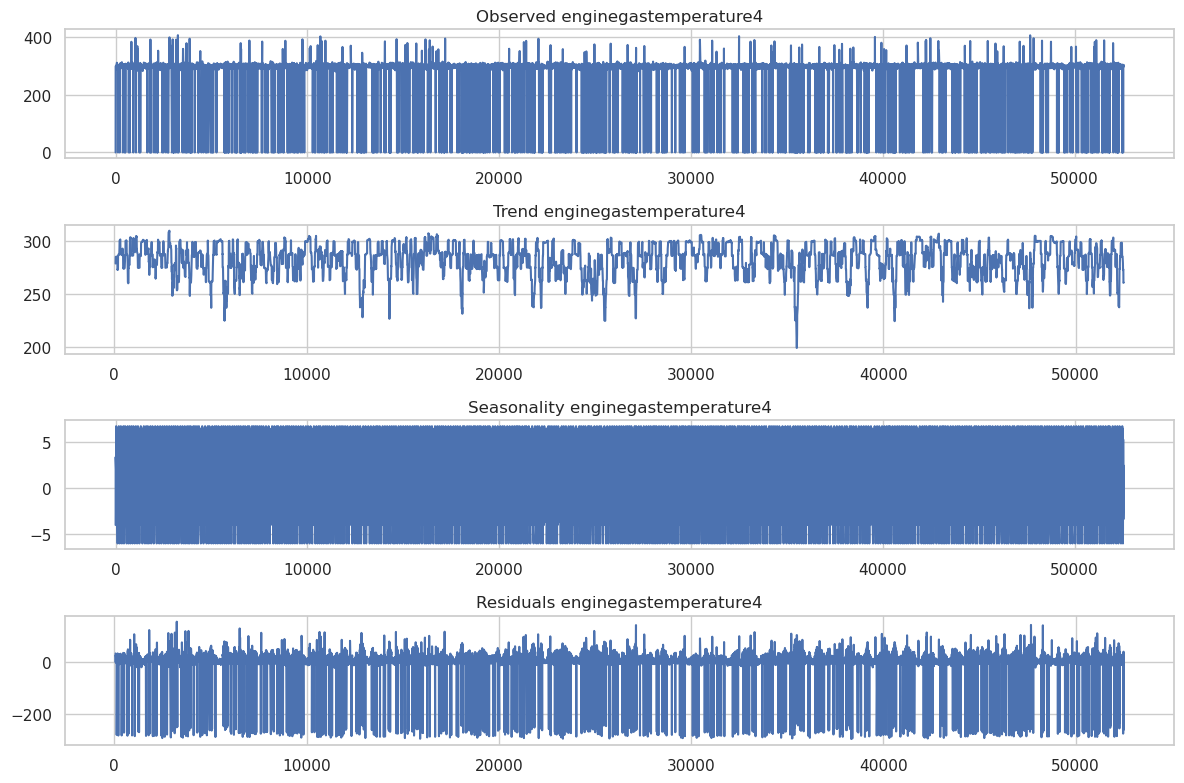

Analysis of enginegastemperature4:
Trend: Seasonality: Residuals: --------------------


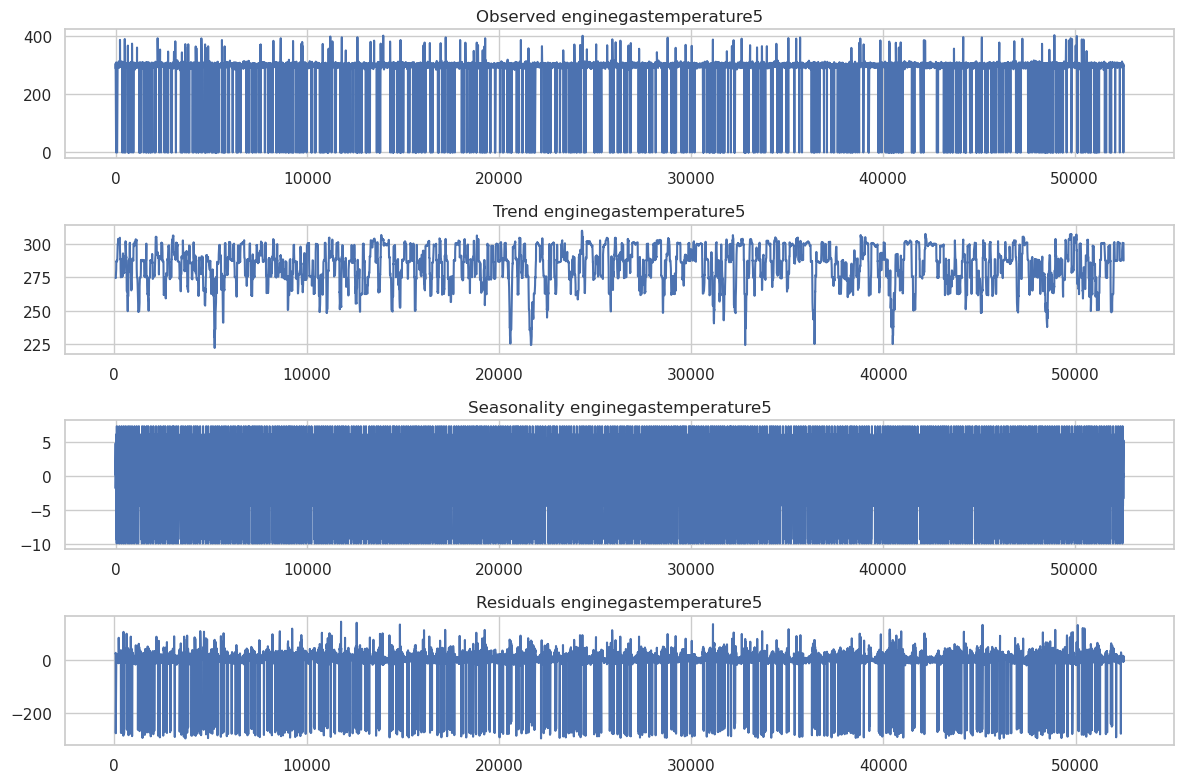

Analysis of enginegastemperature5:
Trend: Seasonality: Residuals: --------------------


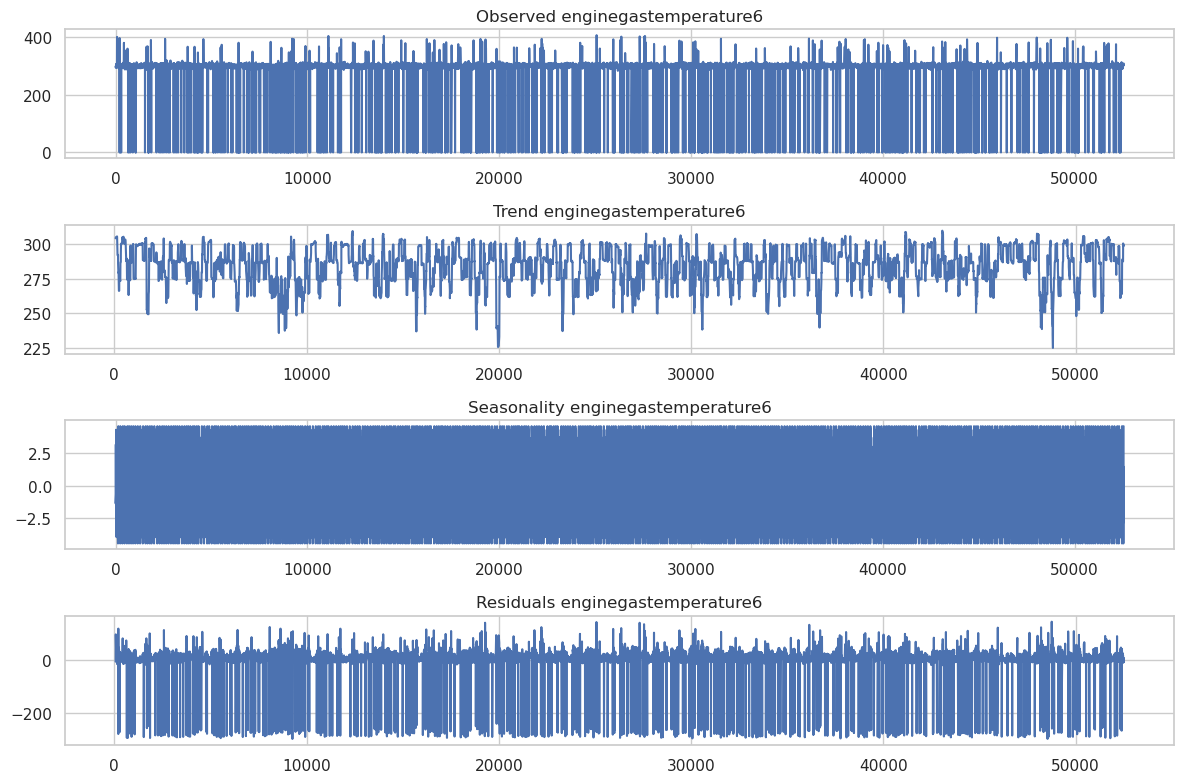

Analysis of enginegastemperature6:
Trend: Seasonality: Residuals: --------------------


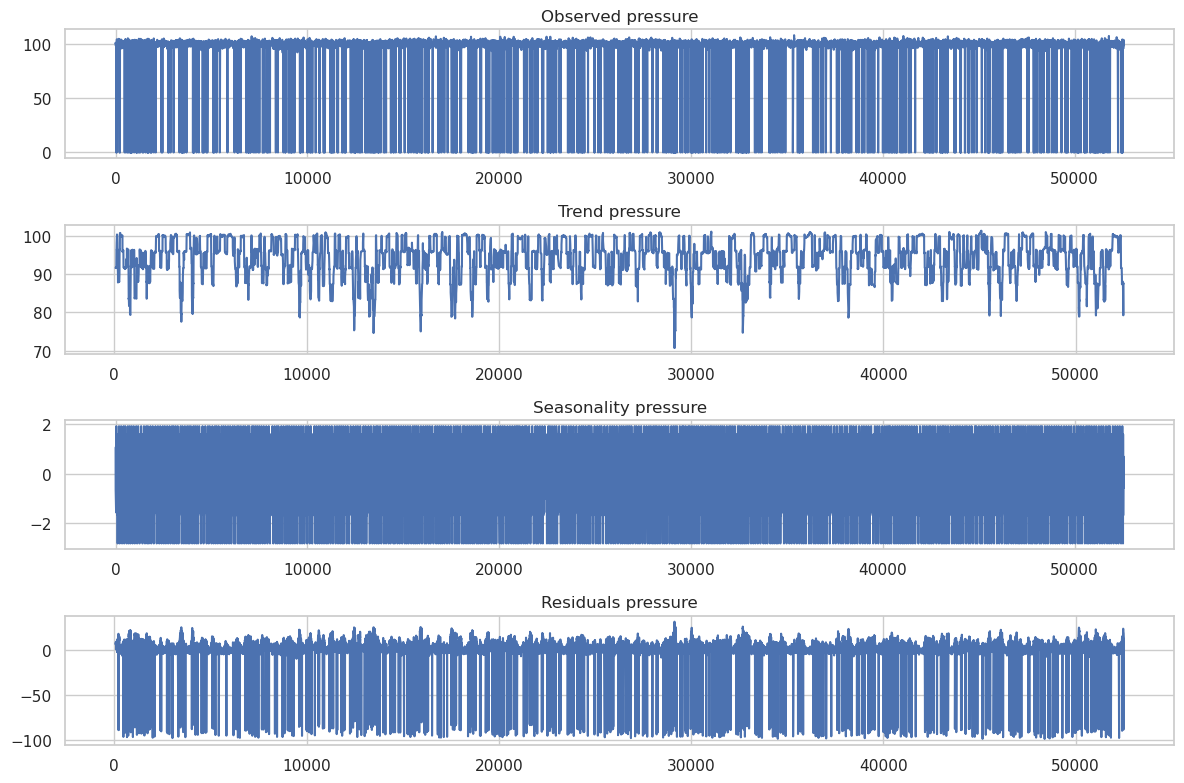

Analysis of pressure:
Trend: Seasonality: Residuals: --------------------


In [101]:

# Iterate through the relevant variables
for var in variables:
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(m1_df_sample[var], model='additive', period=24)  # Assuming daily seasonality

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(decomposition.observed)
    plt.title(f'Observed {var}')
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend)
    plt.title(f'Trend {var}')
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal)
    plt.title(f'Seasonality {var}')
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid)
    plt.title(f'Residuals {var}')
    plt.tight_layout()
    plt.show()

    # Analyze the plots and document observations (example)
    print(f"Analysis of {var}:")
    print("Trend: ", end="") # Add your trend observation here
    print("Seasonality: ", end="") # Add your seasonality observation here
    print("Residuals: ", end="") # Add your residual observation here
    print("-" * 20)

In [105]:
def analyze_seasonality(df, time_col='datetimestamp', freq='D'):
    # Convert datetime column
    df[time_col] = pd.to_datetime(df[time_col])
    df = df.set_index(time_col)
    
    # Resample to daily frequency (or change as needed)
    df_daily = df.resample(freq).mean()

    # Iterate through each numeric column
    for col in df_daily.select_dtypes(include='number').columns:
        print(f"\n Seasonality for: {col}")
        
        # Drop NA values (required for decomposition)
        series = df_daily[col].dropna()

        if len(series) < 2:
            print("❌Not enough data to analyze.")
            continue
        
        try:
            result = seasonal_decompose(series, model='additive', period=7)  # or period=365 for yearly
            # Plot seasonal decomposition with custom settings
            fig = result.plot()
            fig.set_size_inches(14, 10)  # 🔧 Chart size (width, height)
            
            # Rotate x-axis labels and adjust font size
            for ax in fig.axes:
                ax.tick_params(axis='x', rotation=45, labelsize=10)  # ⏱️ Rotate x-axis, set font size
                ax.tick_params(axis='y', labelsize=10)  # Set y-axis font size
                ax.set_ylabel(ax.get_ylabel(), fontsize=12)
                ax.set_title(ax.get_title(), fontsize=14)
            
            plt.suptitle(f'Seasonal Decomposition of {col}', fontsize=16)
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
            plt.show()
        except Exception as e:
            print(f"⚠️ Could not decompose {col}: {e}")



 Seasonality for: enginegastemperature1


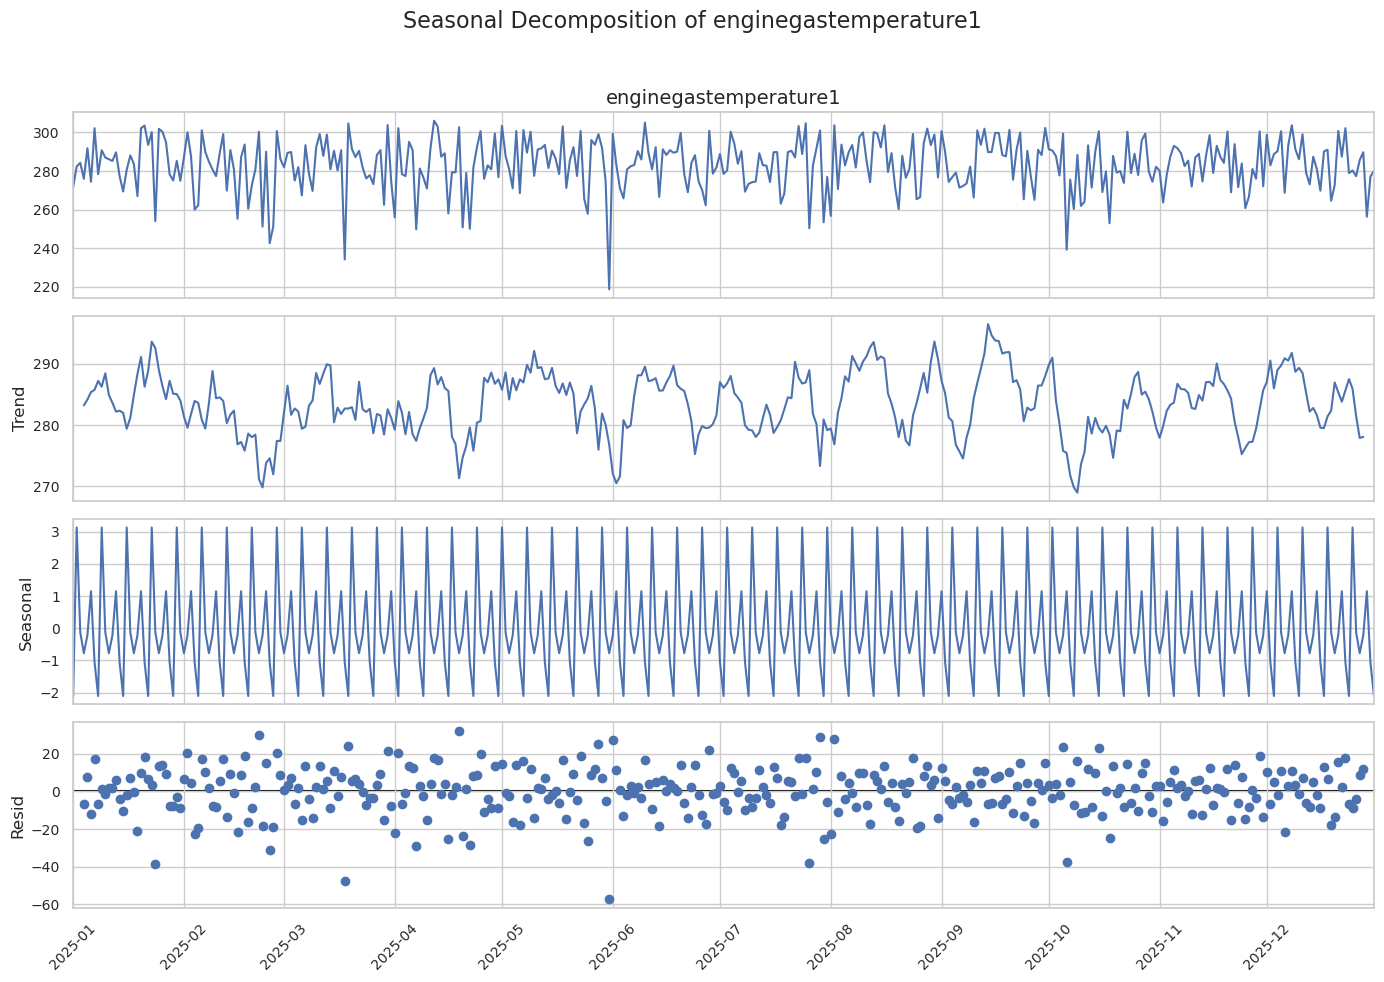


 Seasonality for: enginegastemperature2


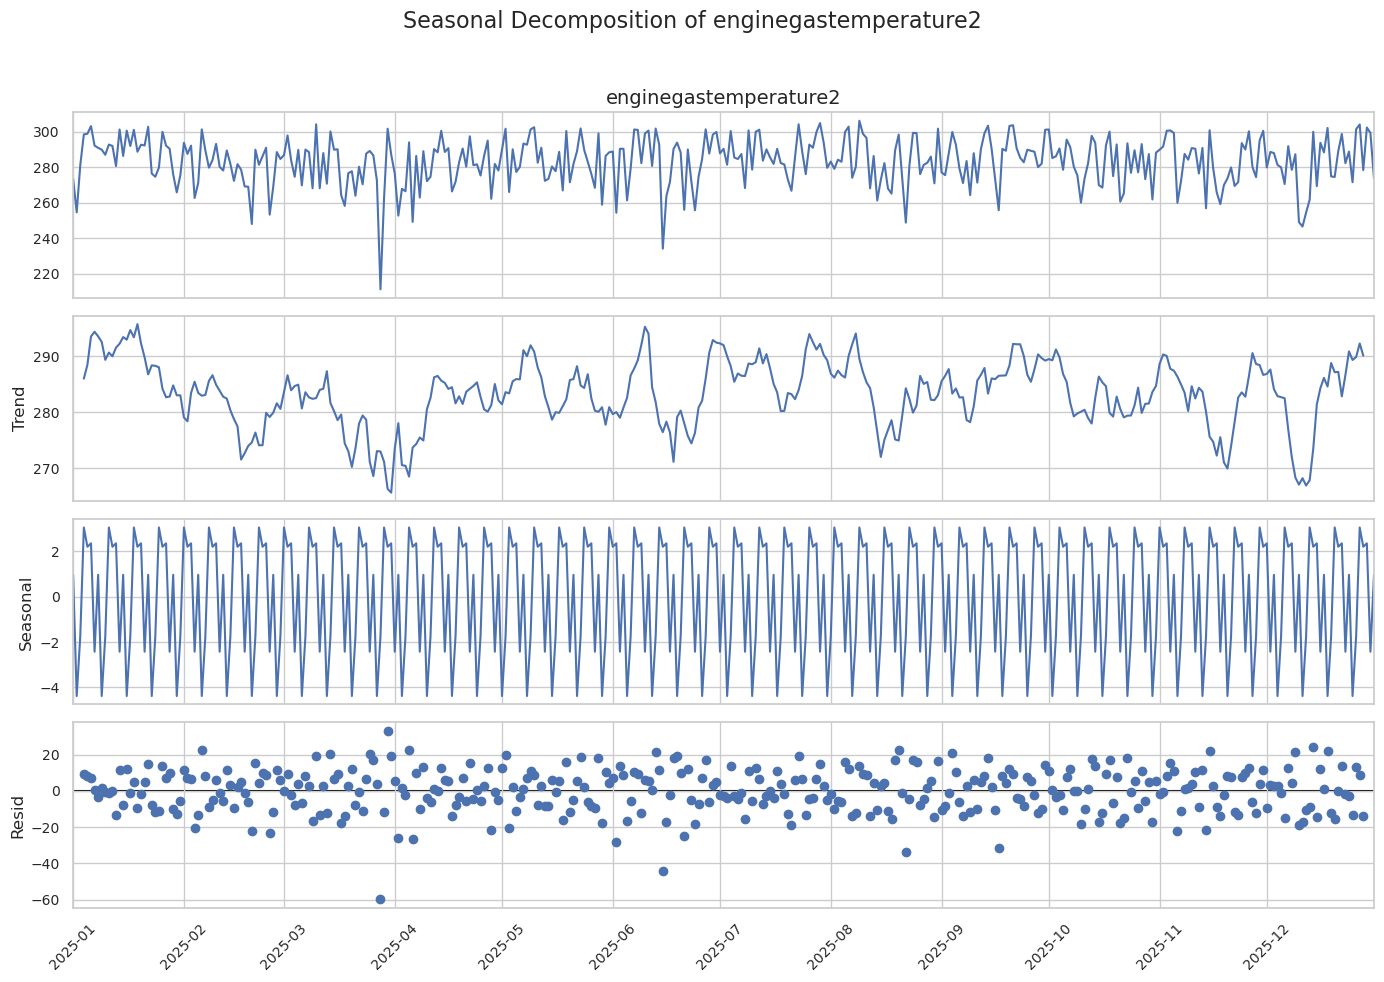


 Seasonality for: enginegastemperature3


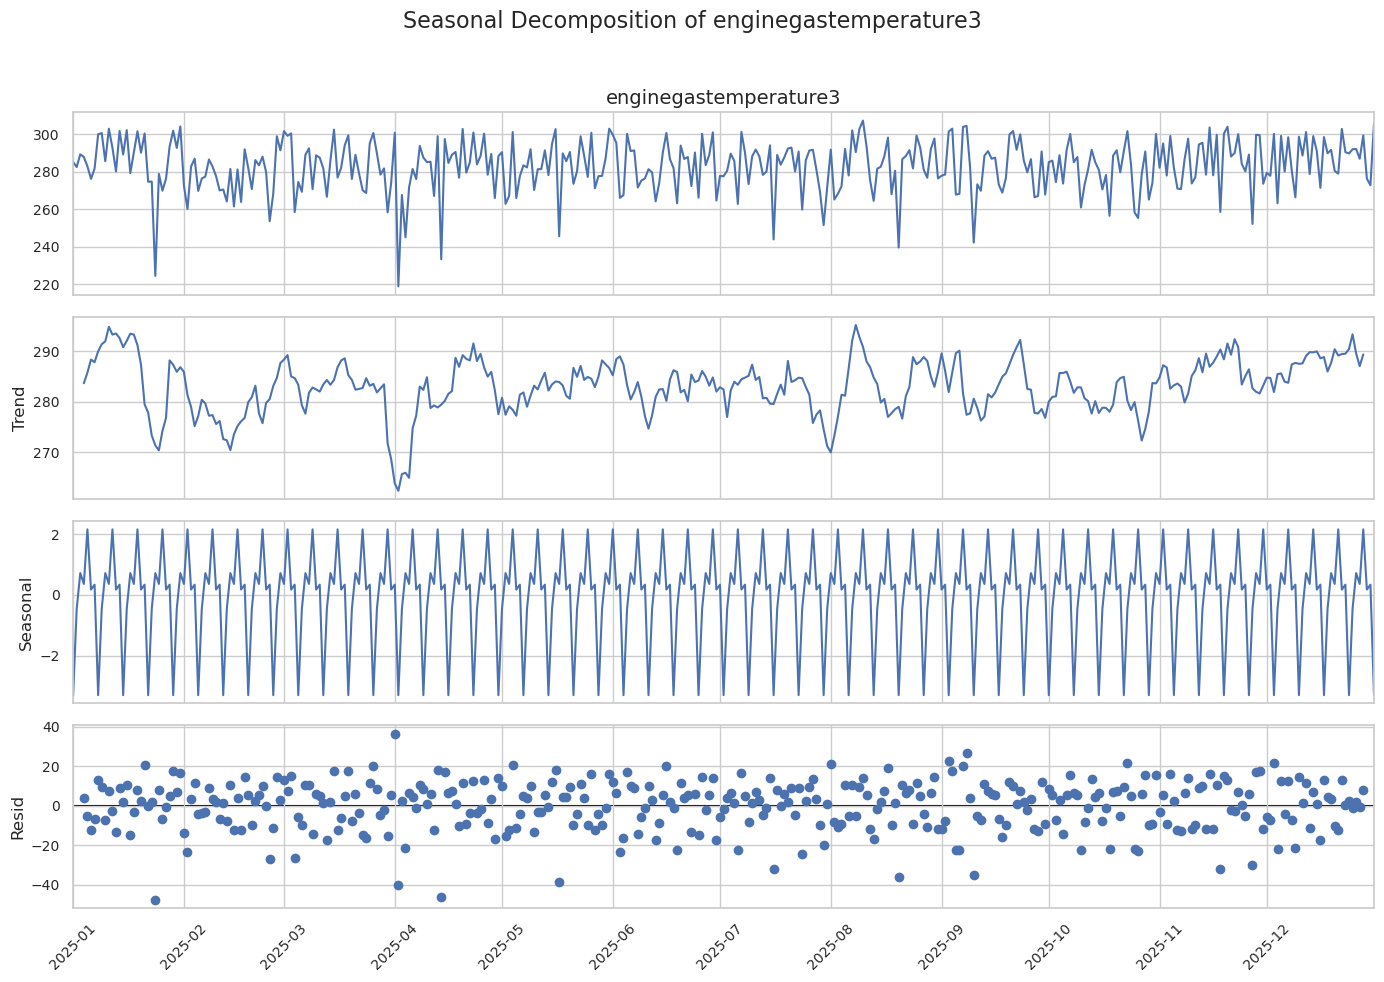


 Seasonality for: enginegastemperature4


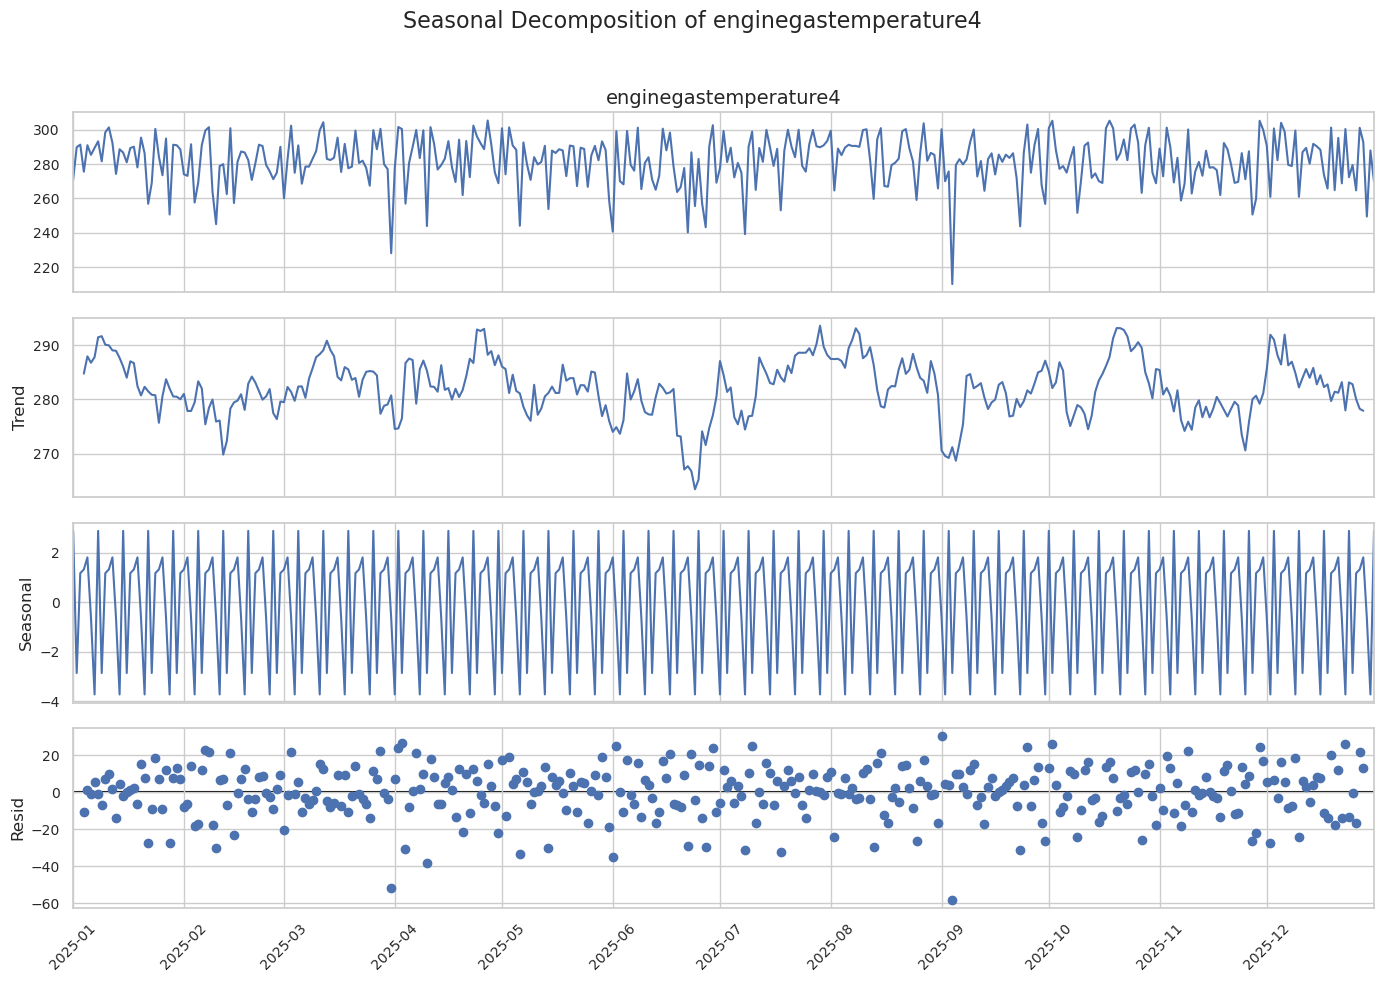


 Seasonality for: enginegastemperature5


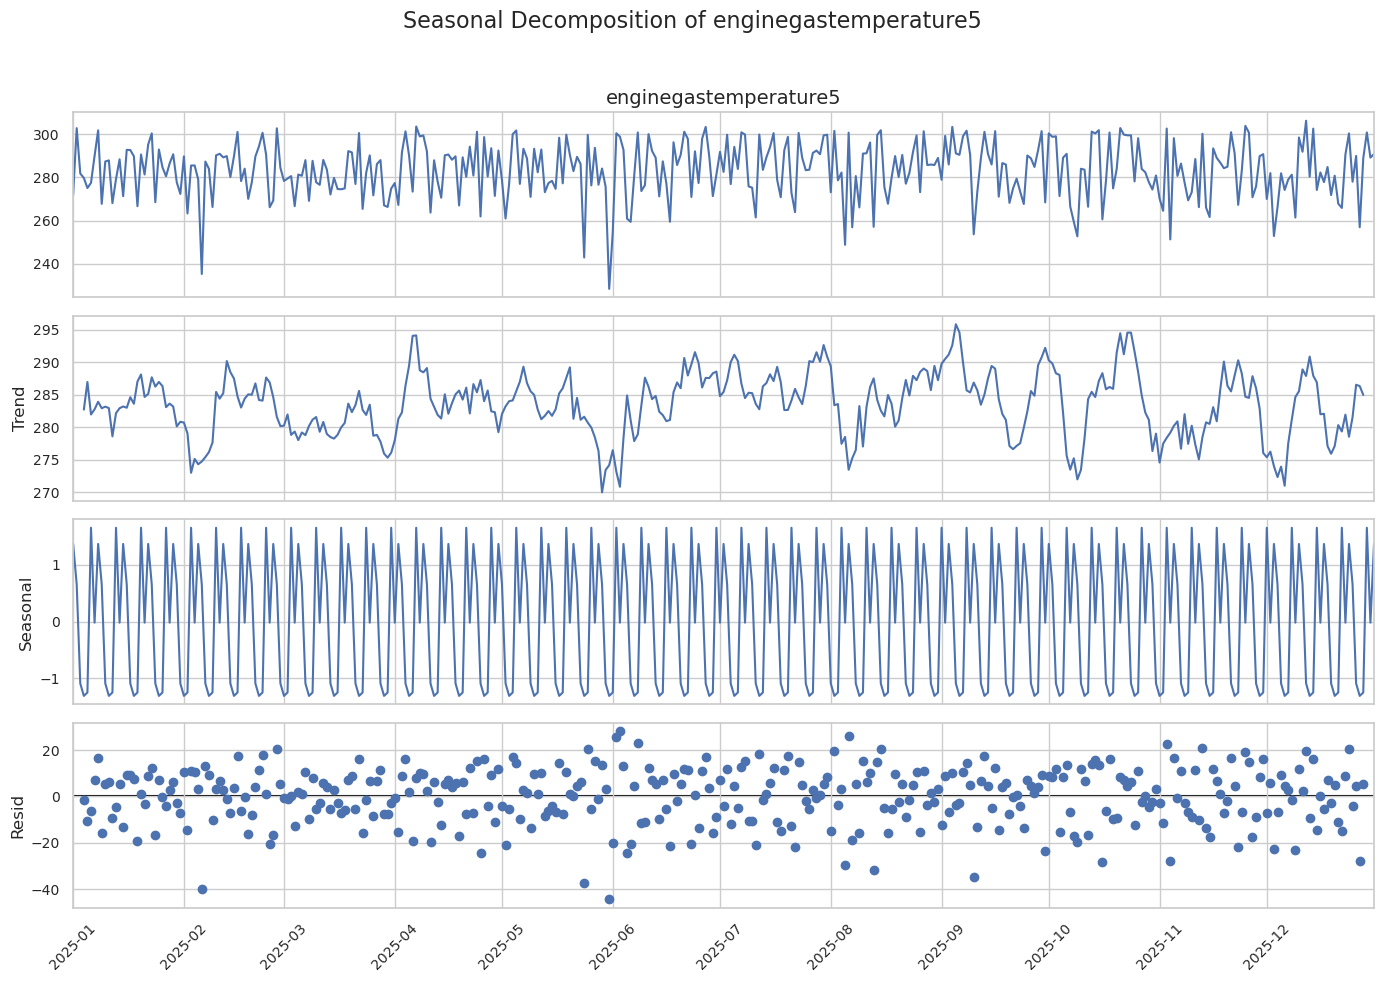


 Seasonality for: enginegastemperature6


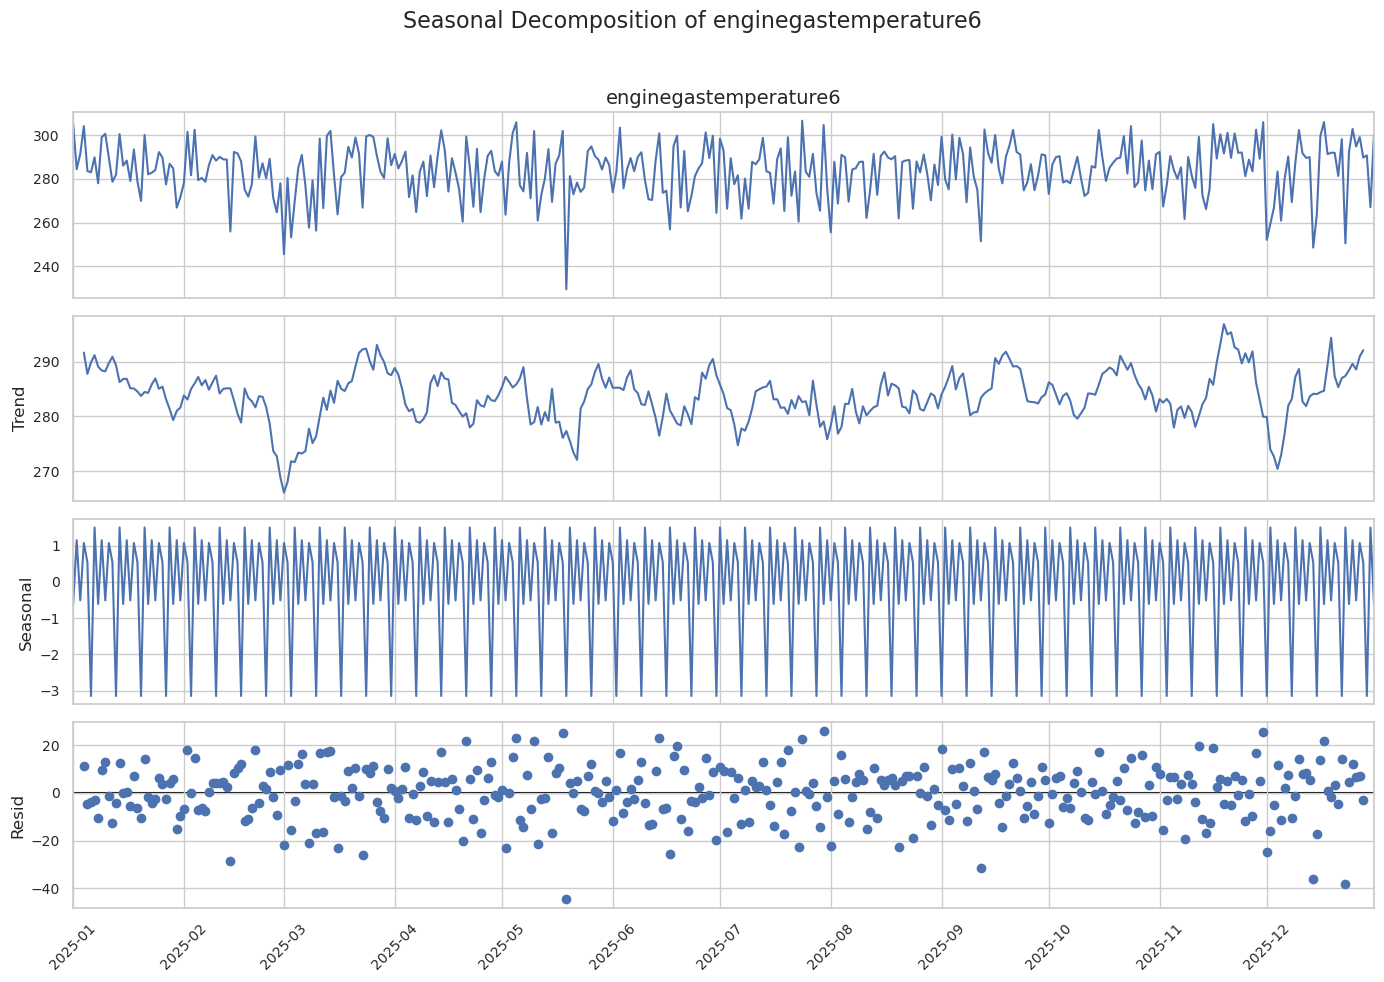


 Seasonality for: pressure


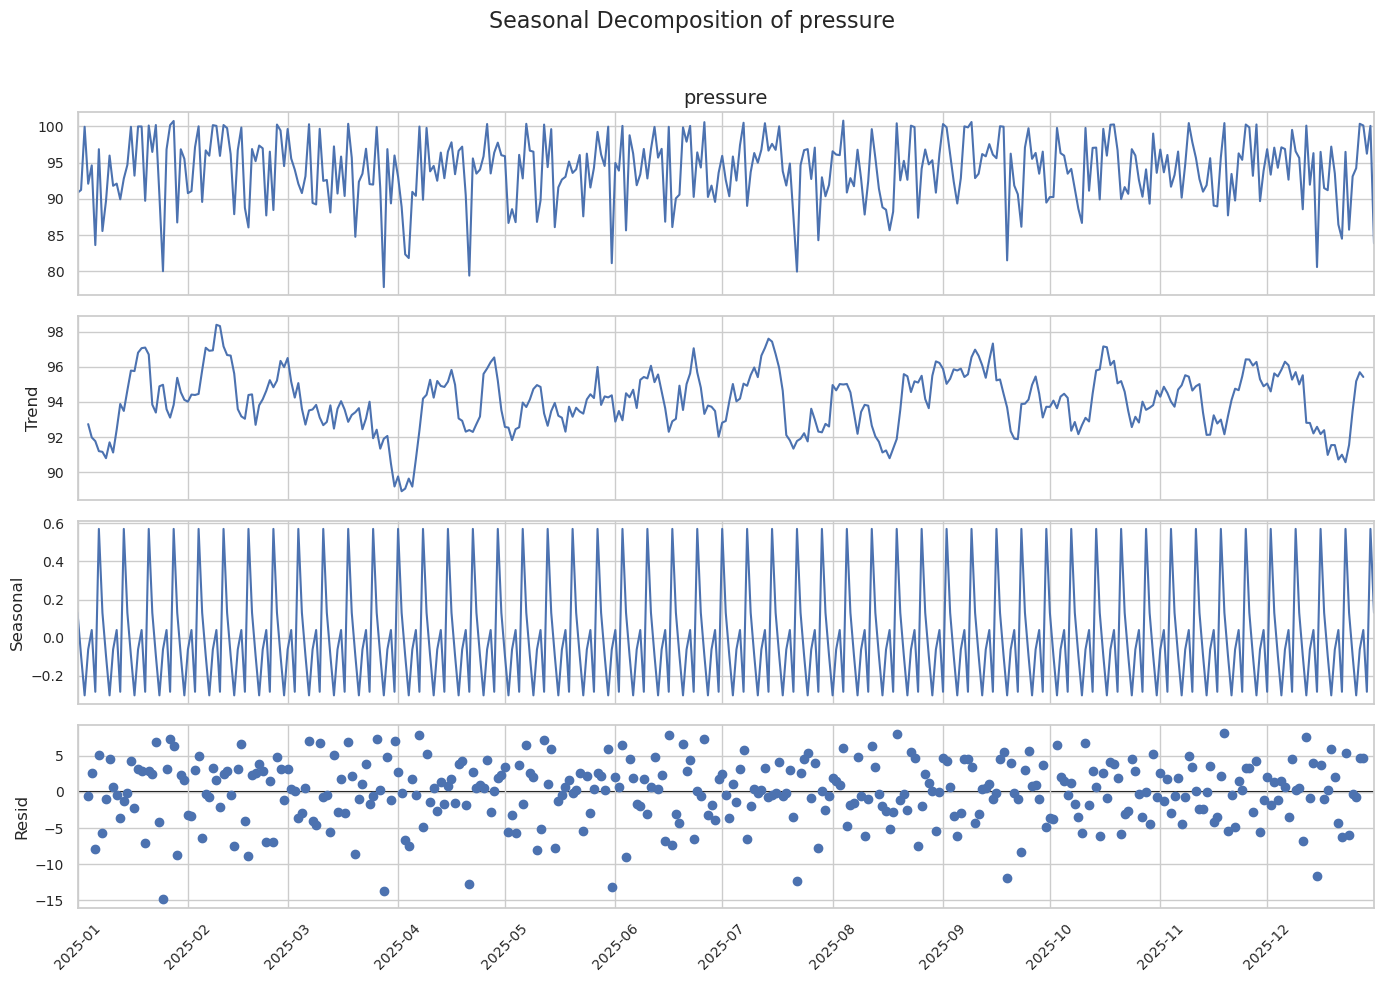

In [106]:
analyze_seasonality(df=m1_df_sample, time_col='datetimestamp', freq='D')

# Rollling

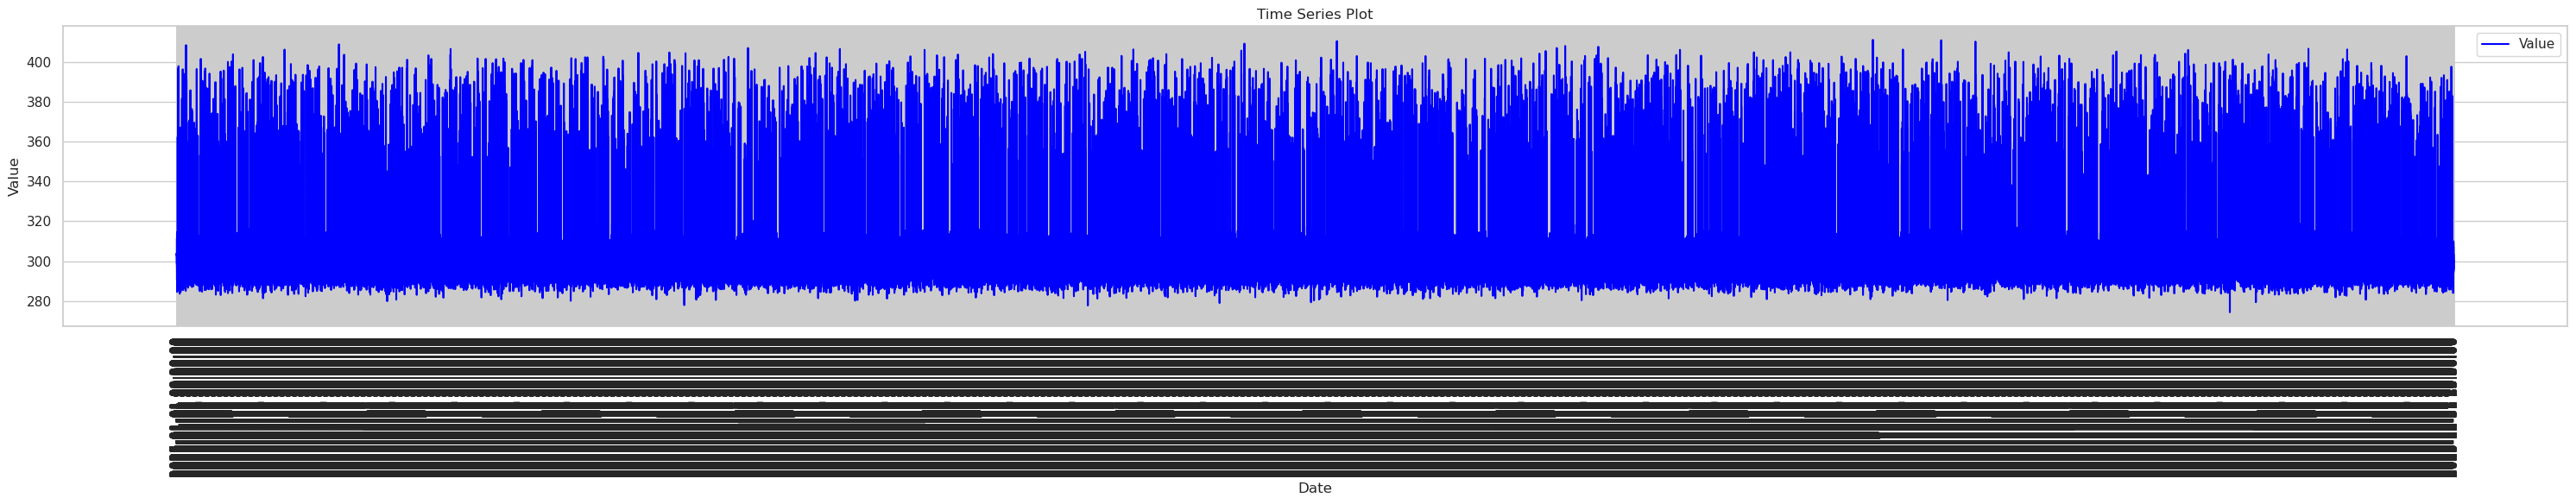

In [35]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['enginegastemperature1'], label='Value', color='blue')
plt.xticks(rotation=90)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='datetimestamp'>

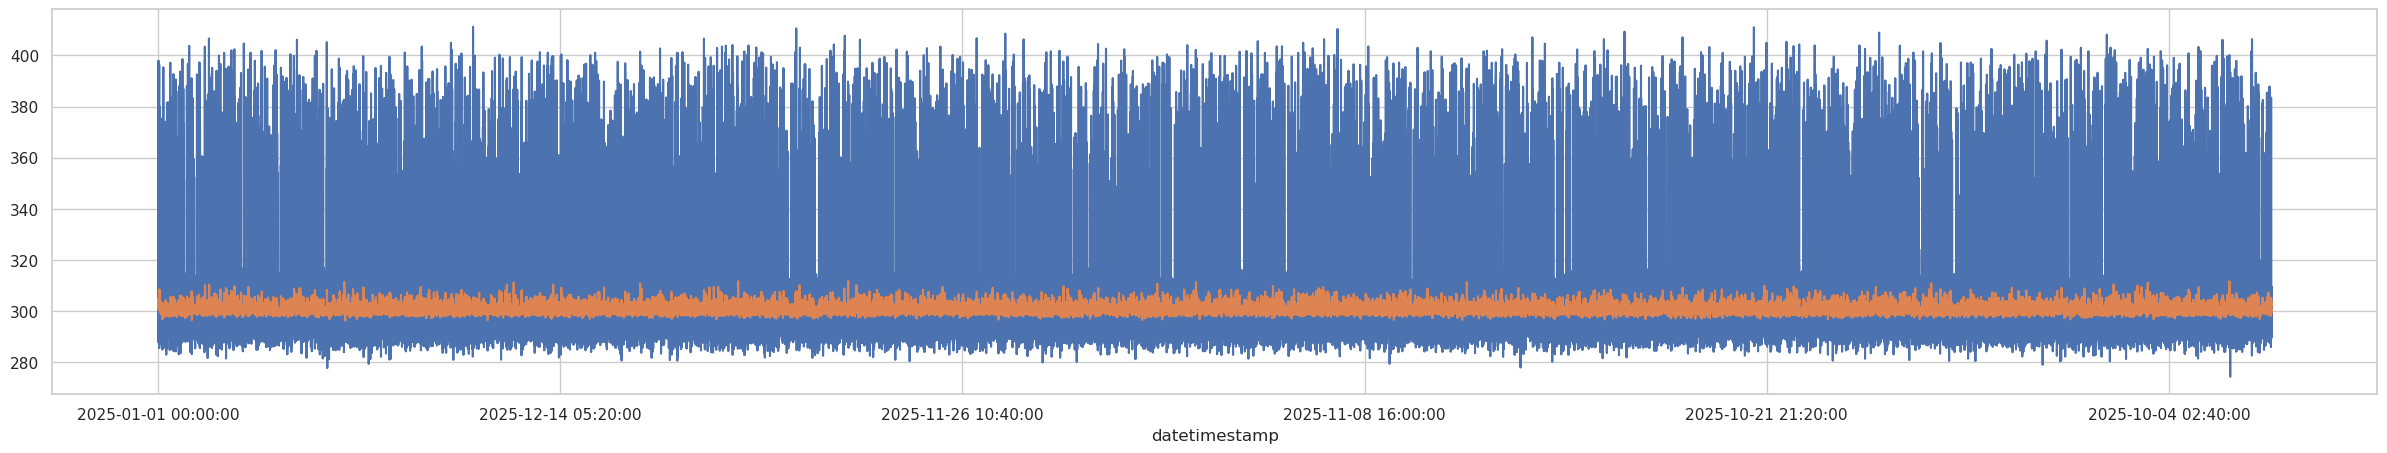

In [33]:
df['enginegastemperature1'].plot(figsize=(30,5))
plt.xticks(rotation=90)
df.rolling(window=30).mean()['enginegastemperature1'].plot()


# Feature eng

In [107]:
feature engineering considering that I want to perform anomaly detection and use the temperature of each sensor to detect anomalies 

# Based on the goal of anomaly detection using temperature data, here are features relevant to capturing anomalies and potential failures:

# 1. Rolling Mean and Standard Deviation (already calculated with window_size=12):
# These features capture the smoothed trend and variability of the temperature over a recent window. Deviations from these can indicate an anomaly.

# 2. Rate of Change (already calculated as _diff):
# This feature captures how quickly the temperature is changing. Sudden spikes or drops could indicate a sensor malfunction or an unusual event.

# 3. Deviation from Rolling Mean:
# Explicitly calculating the difference between the current reading and the rolling mean can be a powerful feature. A large positive or negative deviation indicates the current reading is far from its recent average.

for col in temperature_columns:
    df[f'{col}_deviation_from_rolling_mean_{window_size}'] = df[col] - df[f'{col}_rolling_mean_{window_size}']

# 4. Ratio to Rolling Standard Deviation:
# This feature normalizes the deviation by the recent variability. A high value indicates a significant deviation relative to the typical fluctuations, making it robust to different sensors or operating conditions. This is essentially the Z-score calculated on a rolling basis.

for col in temperature_columns:
    df[f'{col}_ratio_to_rolling_std_{window_size}'] = df[f'{col}_deviation_from_rolling_mean_{window_size}'] / df[f'{col}_rolling_std_{window_size}']

# 5. Time-based features (already calculated: hour, dayofweek):
# These capture potential cyclical patterns in temperature related to time of day or day of week, which might influence normal temperature ranges. Anomalies might occur more frequently during specific times.

# 6. Lagged Features:
# Including previous temperature readings can help the model understand the time-dependent nature of the data and predict future values or detect deviations from expected sequences.

lag_size = 1 # Example lag size

for col in temperature_columns:
    df[f'{col}_lag_{lag_size}'] = df[col].shift(lag_size)

# 7. Expanding Statistics:
# While rolling statistics focus on a fixed window, expanding statistics consider all data up to the current point. This can capture long-term trends and deviations from the overall history.

# for col in temperature_columns:
#     df[f'{col}_expanding_mean'] = df[col].expanding().mean()
#     df[f'{col}_expanding_std'] = df[col].expanding().std()

# Note: Expanding statistics can be less sensitive to recent changes compared to rolling statistics, but can be useful as supplementary features.

# 8. Interactions:
# Interactions between different temperature sensors or between temperature and pressure could reveal relationships that break down during a failure. For example, a sudden divergence between two temperature sensors that usually track closely.

# Example interaction feature: difference between two temperature sensors
# df['temp_diff_1_2'] = df['enginegastemperature1'] - df['enginegastemperature2']

# 9. Features based on the defined failure criteria:
# While `_failure_flag` is the target, the components used to calculate it (deviation from rolling mean, rolling std) are valuable features for the model to learn the patterns leading to a failure.

# Drop rows with NaN values introduced by lagging and rolling calculations
df.dropna(inplace=True)

# Display the dataframe with new features
display(df.head())

# Update the list of features for modeling
features = [col for col in df.columns if col not in temperature_failure_flags and col not in ['datetimestamp']]

X = df[features]
y = df[temperature_failure_flags]

# Re-split the data with the new features
train_size = int(len(df) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(df)]
y_train, y_test = y[0:train_size], y[train_size:len(df)]

print("\nUpdated Training set shapes:")
print(f"Features (X_train): {X_train.shape}")
print(f"Targets (y_train): {y_train.shape}")
print("\nUpdated Testing set shapes:")
print(f"Features (X_test): {X_test.shape}")
print(f"Targets (y_test): {y_test.shape}")

SyntaxError: invalid syntax (2061283671.py, line 1)

In [111]:
def generate_anomaly_features(df, time_col='datetimestamp', machine_col='machineid',
                               sensor_cols=None, rolling_window=6):
    """
    Generate time-based, rolling, lag, and cumulative features for anomaly detection.

    Parameters:
        df (pd.DataFrame): Input dataframe
        time_col (str): Name of the timestamp column
        machine_col (str): Machine ID or grouping column
        sensor_cols (list): List of sensor columns to engineer features on
        rolling_window (int): Window size for rolling statistics

    Returns:
        pd.DataFrame: DataFrame with new engineered features
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    df = df.sort_values([machine_col, time_col])

    # Basic time features
    df['hour'] = df[time_col].dt.hour
    df['dayofweek'] = df[time_col].dt.dayofweek
    df['month'] = df[time_col].dt.month
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

    # If no sensor columns provided, auto-detect numeric columns (excluding IDs and datetime)
    if sensor_cols is None:
        sensor_cols = df.select_dtypes(include='number').columns.difference([machine_col])

    # Rolling stats, lag, diff, cumsum
    for col in sensor_cols:
        group = df.groupby(machine_col)[col]
        df[f'{col}_roll_mean'] = group.transform(lambda x: x.rolling(rolling_window, min_periods=1).mean())
        df[f'{col}_roll_std'] = group.transform(lambda x: x.rolling(rolling_window, min_periods=1).std())
        df[f'{col}_lag1'] = group.shift(1)
        df[f'{col}_diff1'] = df[col] - df[f'{col}_lag1']
        df[f'{col}_cumsum'] = group.cumsum()

    return df

# Model

## model approaches considering that I want to perform anomaly detection and use the temperature of each sensor to detect anomalies 

Based on the exploratory data analysis, feature engineering, and the goal of detecting temperature port failures using time series data, here are several promising modeling approaches, along with their pros and cons:

1.  **Statistical Time Series Models (e.g., ARIMA, SARIMA):**
    *   **Pros:** Good for modeling linear relationships, capturing seasonality and trends. Can provide interpretable insights into the underlying time series structure.
    *   **Cons:** Primarily designed for univariate time series forecasting. Extending to multivariate (multiple sensors) can be complex (VARIMA). Less effective at capturing complex non-linear patterns or incorporating many external features (like rolling statistics, time of day). Requires stationary data or differencing. May not directly handle the defined anomaly criteria (deviation from rolling mean) well without significant pre-processing.

2.  **Traditional Machine Learning Models (e.g., Logistic Regression, Random Forest, Gradient Boosting - XGBoost, LightGBM):**
    *   **Pros:** Can handle multivariate data and incorporate the engineered features (rolling statistics, rate of change, time-based features, deviations). Relatively interpretable (especially tree-based models). Can handle non-linear relationships. XGBoost/LightGBM are powerful and often perform well on structured data. Class imbalance can be addressed using techniques like class weighting, SMOTE, or specific algorithms designed for imbalanced data.
    *   **Cons:** Treats the time series data as independent samples unless lagged features are explicitly engineered. Doesn't inherently model the sequential dependencies in the data as well as dedicated time series models or recurrent neural networks.

3.  **Anomaly Detection Algorithms (e.g., Isolation Forest, One-Class SVM, Local Outlier Factor - LOF):**
    *   **Pros:** Specifically designed for identifying outliers or anomalies in data without requiring labeled anomaly data during training (unsupervised or semi-supervised). Can be effective if the "failure" is truly a rare event that looks distinctly different from normal operating conditions.
    *   **Cons:** May struggle to distinguish between "true" failures and other types of outliers or noisy data. One-Class SVM can be sensitive to hyperparameter tuning. LOF is density-based and can be computationally expensive for large datasets. These models might flag deviations based purely on feature distribution, which may not always align with the defined failure criteria (deviation from rolling statistics).

4.  **Deep Learning Models (e.g., Recurrent Neural Networks - RNNs, LSTMs, GRUs, Transformers):**
    *   **Pros:** Excellent at modeling sequential data and capturing temporal dependencies and complex non-linear patterns automatically from raw or minimally engineered time series data. Can potentially learn intricate relationships between different sensors over time. LSTMs and GRUs are effective at handling vanishing gradients. Can be trained to predict the next temperature value and flag anomalies based on large prediction errors, or trained directly on the engineered features.
    *   **Cons:** Require significant amounts of data and computational resources. Can be complex to design and train. Less interpretable than traditional models. Prone to overfitting, especially on smaller datasets.

5.  **Hybrid Approaches:**
    *   **Pros:** Combining strengths of different methods. For example, using statistical methods or deep learning to extract features or predict baseline behavior, and then using a simpler model (like Logistic Regression or a thresholding method) on the residuals or deviations to detect anomalies. Or using unsupervised anomaly detection algorithms to pre-filter potential anomalies which are then examined by a supervised model.

**Suggested Approach(es) based on the current analysis:**

Given that you have successfully engineered features that capture deviations from expected behavior based on rolling statistics, and you have a defined target variable (even if rare), a **supervised or semi-supervised approach using traditional machine learning models or deep learning on the engineered features** seems most promising initially.

*   **Option A (Traditional ML):** Use models like **XGBoost, LightGBM, or Random Forest** trained on the engineered features (original readings, rolling stats, deviations, ratios, diffs, time features, lags). These models are powerful, can handle the potentially large feature space, and can incorporate techniques to mitigate class imbalance. The initial success with Logistic Regression suggests these models, which are generally more powerful, will also perform well.
*   **Option B (Deep Learning):** Train an **LSTM or GRU model** on sequences of the engineered features or even raw temperature data. The model could be trained for sequence prediction (predicting the next time step's temperature) and anomalies could be detected when the prediction error exceeds a threshold. Alternatively, train the LSTM/GRU directly to classify sequences as "normal" or "anomaly" using the engineered features. This could potentially capture more complex temporal patterns leading to failures.
*   **Option C (Anomaly Detection as a first pass):** Use an **Isolation Forest** or **One-Class SVM** on the engineered features (especially those related to deviation and ratio) to identify the most significant outliers. These identified outliers could then be further analyzed or used to refine the training set for a supervised model.

**Recommendation:**

Start with **Option A (XGBoost/LightGBM)**. These models are generally easier to implement and interpret compared to deep learning and have a strong track record in similar problems. Leverage the engineered features related to deviations (`_deviation_from_rolling_mean`, `_ratio_to_rolling_std`), as these directly capture the criteria you've defined for a failure. Address the class imbalance rigorously using techniques within these algorithms (e.g., `scale_pos_weight` in XGBoost/LightGBM) or through data resampling.

If the performance of traditional ML is not satisfactory, or if there's evidence of complex temporal patterns not captured by the engineered features, then explore **Option B (LSTM/GRU)**. This would involve structuring the data into sequences and training a recurrent model.

Using **Option C (Anomaly Detection)** can be a valuable supplementary approach to identify potential anomalies that might not strictly meet the defined 3-sigma rule but are still unusual and worth investigating.

Continue to iterate on feature engineering and model evaluation, focusing on metrics appropriate for imbalanced datasets like Precision, Recall, F1-score, and the Area Under the Precision-Recall Curve (AUPRC), in addition to ROC AUC.

# Results

* Time series decomposition was performed on all variables to identify trends, seasonality, and residuals. However, the provided output lacks the analysis of the generated plots.
  A correlation heatmap visualized the relationships between the numerical variables in the dataset, excluding `machineID`.
  *   New time-based features (`day_of_week`, `hour_of_day`, `month`, `week_of_year`) were engineered from the datetime index.